# Tabla de contenido 

* [Gráficas dispersión Physionet](#1) 
* [Gráficas de frecuencia Physionet](#2)
* [Gráficas de Entropia vs Entropia Physionet](#3)
* [Comparación de entropias en pruebas de esfuerzo](#4)
* [Repetibilidad del método](#5)
* [Cambio de entropia en prubas de esfuezo](#6)
* [Entropia vs Entropia Pruebas de esfuerzo](#7)
* [Gráficas de dispersión en variabilidad cardiaca](#8)


In [1]:
import pandas as pd
import seaborn as sns
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from IPython.display import display, HTML
from matplotlib.ticker import FormatStrFormatter

In [2]:
%matplotlib inline

In [3]:
dormidos=pd.read_csv('entropyPaper/Data/physionet/Sleep.csv')
despiertos=pd.read_csv('entropyPaper/Data/physionet/Wake.csv')

In [4]:
dormidosCHF=dormidos[dormidos['Class']==1]
dormidosH=dormidos[dormidos['Class']==0]
despiertosCHF=despiertos[despiertos['Class']==1]
despiertosH=despiertos[despiertos['Class']==0]

In [5]:
dormidosCHF.head()

,Subject,SampleEntropy,FuzzyEntropy,ApEntropy,Class
0,chf001s.txt,0.485001,0.2652,0.6739,1
1,chf002s.txt,0.383171,0.3914,0.5777,1
2,chf004s.txt,0.445298,0.2151,0.6450,1
3,chf005s.txt,0.973072,0.3695,1.0589,1
4,chf006s.txt,0.601315,0.6085,0.9845,1


# Gráficas de magnitud para las diferentes entropias Physionet  <a id="1"></a>

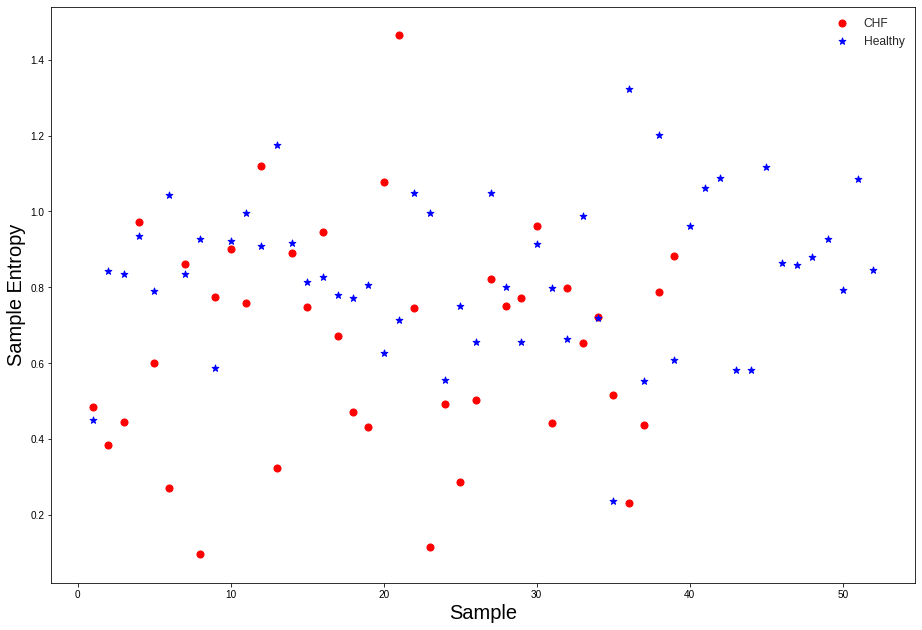

In [6]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(dormidosCHF)+1),dormidosCHF['SampleEntropy'],c='r',marker='o',s=50);
axes.scatter(np.arange(1,len(dormidosH)+1),dormidosH['SampleEntropy'],c='b',marker='*',s=50);

plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Sample Entropy',fontsize=20)
plt.savefig('./images/Physionet_SE_scatter.jpg')

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]),
 <a list of 8 Text yticklabel objects>)

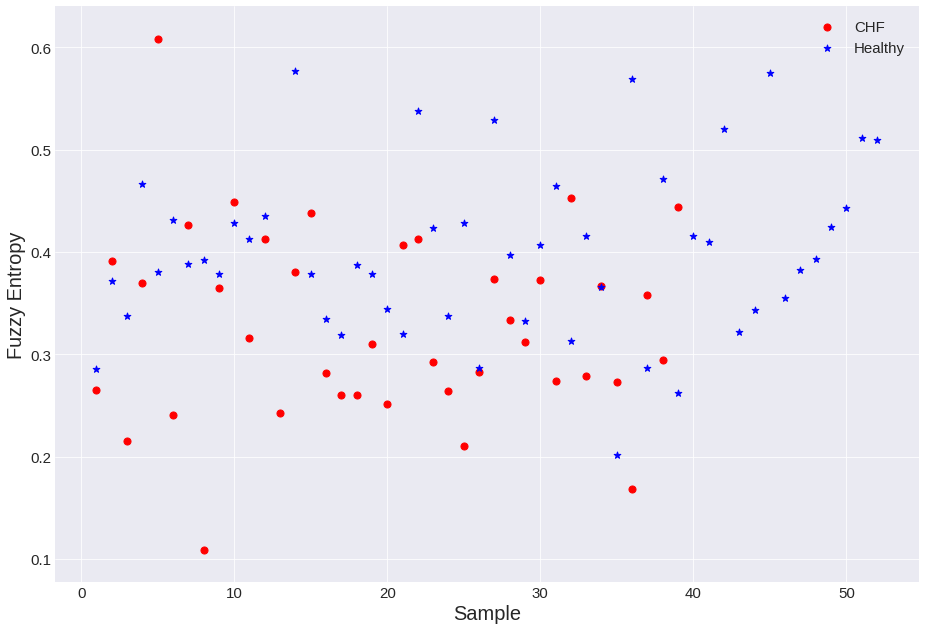

In [7]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(dormidosCHF)+1),dormidosCHF['FuzzyEntropy'],c='r',marker='o',s=50);
axes.scatter(np.arange(1,len(dormidosH)+1),dormidosH['FuzzyEntropy'],c='b',marker='*',s=50);

plt.legend(['CHF','Healthy'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Fuzzy Entropy',fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [8]:
np.arange(1,10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

Text(0, 0.5, 'Ap Entropy')

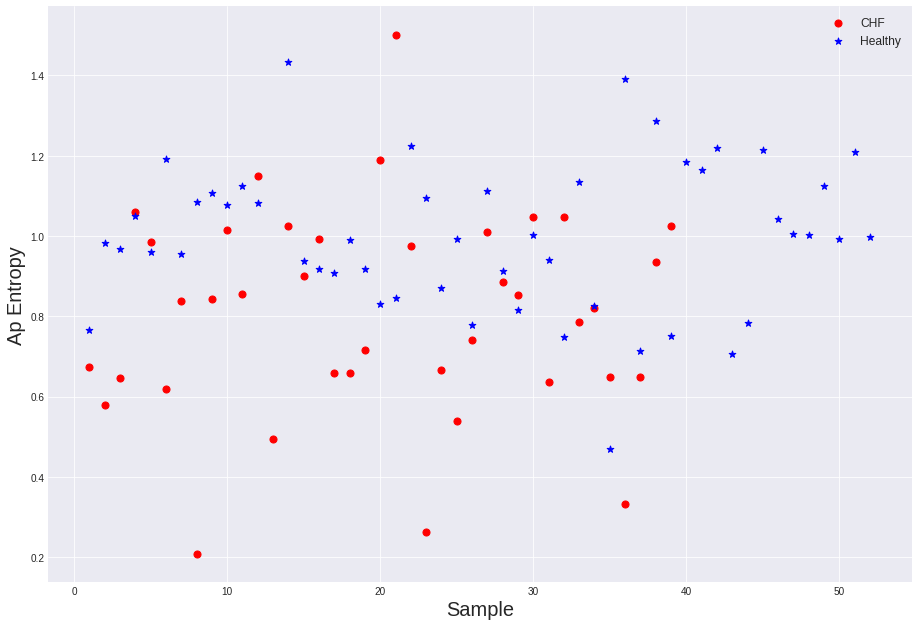

In [9]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(dormidosCHF)+1),dormidosCHF['ApEntropy'],c='r',marker='o',s=50);
axes.scatter(np.arange(1,len(dormidosH)+1),dormidosH['ApEntropy'],c='b',marker='*',s=50);

plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)


# Graficas de frecuencia Physionet<a id="2"></a>

/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text yticklabel objects>)

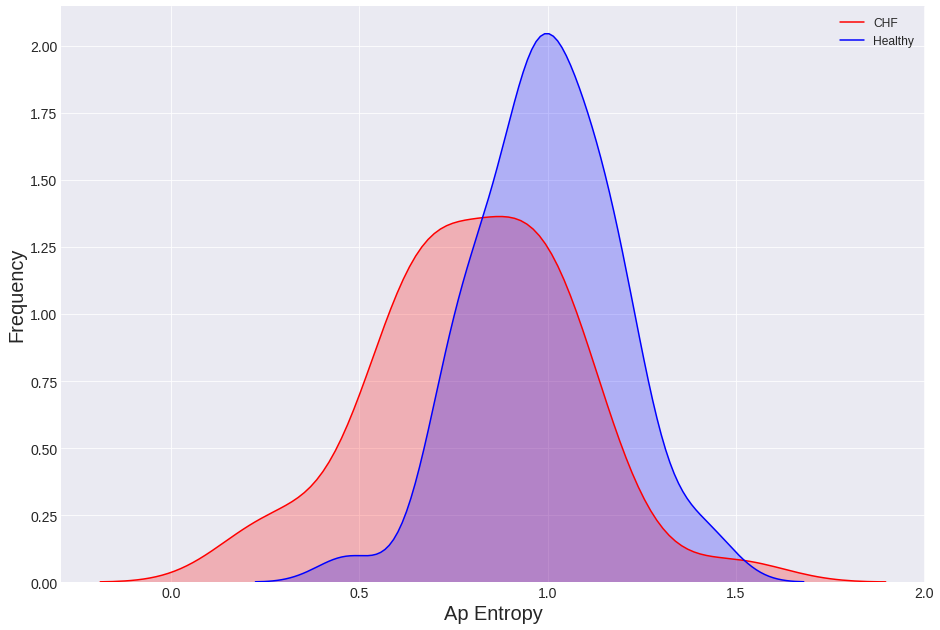

In [10]:
# plot of 2 variables
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot(dormidosCHF['ApEntropy'], shade=True, color="r")
p1=sns.kdeplot(dormidosH['ApEntropy'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Ap Entropy',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#sns.plt.show()


(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 <a list of 10 Text yticklabel objects>)

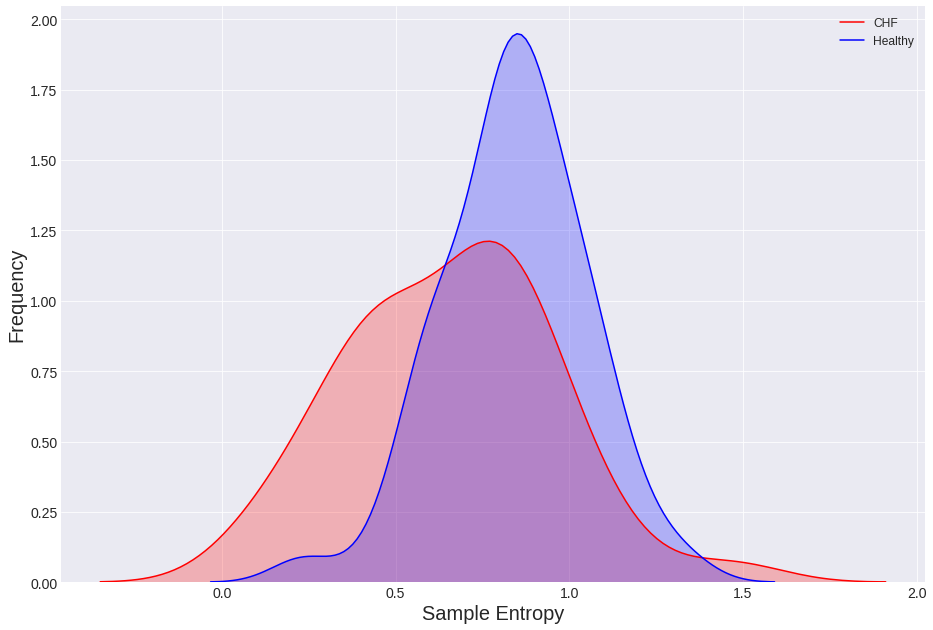

In [11]:
# plot of 2 variables
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot(dormidosCHF['SampleEntropy'], shade=True, color="r")
p1=sns.kdeplot(dormidosH['SampleEntropy'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Sample Entropy',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
#sns.plt.show()

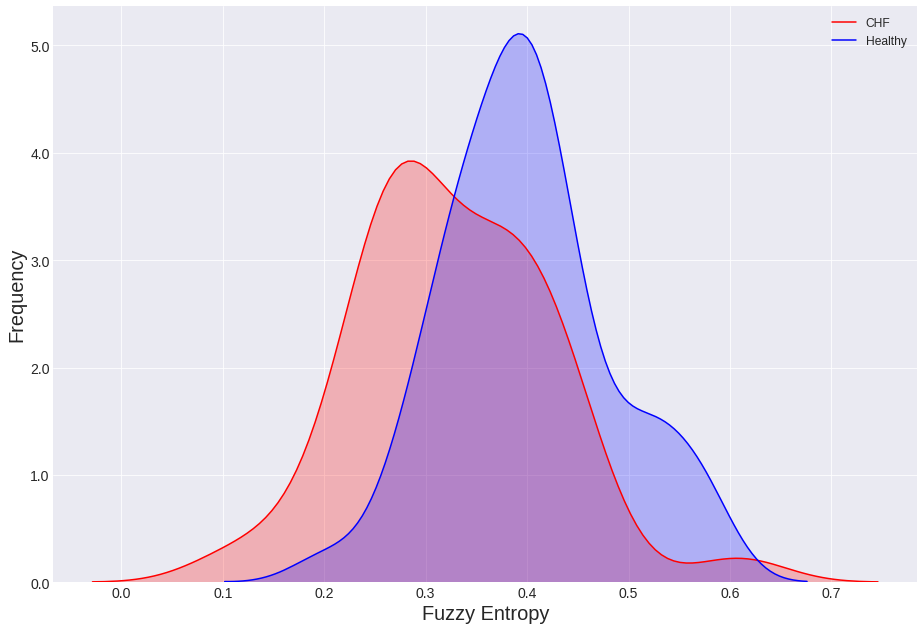

In [12]:
# plot of 2 variables
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
p1=sns.kdeplot(dormidosCHF['FuzzyEntropy'], shade=True, color="r")
p1=sns.kdeplot(dormidosH['FuzzyEntropy'], shade=True, color="b")
plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Fuzzy Entropy',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
axes.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
#sns.plt.show()

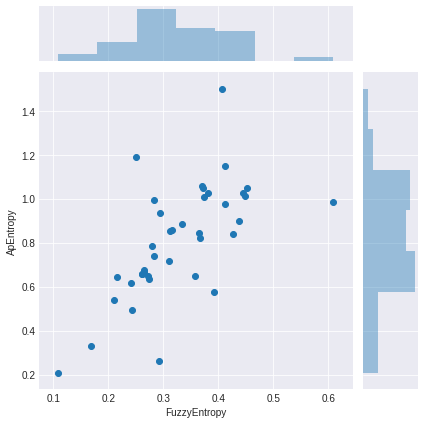

In [13]:
sns.jointplot(x=dormidosCHF['FuzzyEntropy'], y=dormidosCHF['ApEntropy'], kind='scatter')


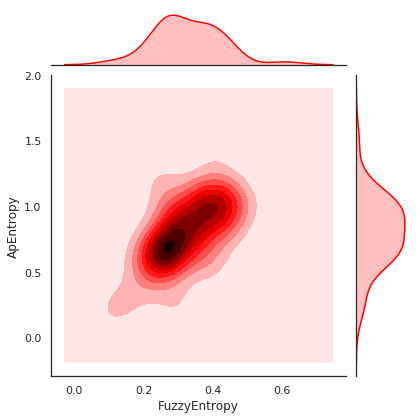

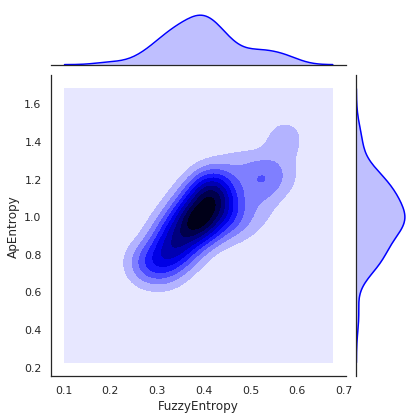

In [14]:
# Custom the color
# fig=plt.figure()
# axes=fig.add_axes([0.1,0.1,2,2])
sns.set(style="white", color_codes=True)
g=sns.jointplot(x=dormidosCHF['FuzzyEntropy'], y=dormidosCHF['ApEntropy'], kind='kde', color="red")
g=sns.jointplot(x=dormidosH['FuzzyEntropy'], y=dormidosH['ApEntropy'], kind='kde', color="blue")


# Gráficas de entropia vs entropia physionet <a id="3"></a>

Text(0, 0.5, 'Fuzzy Entropy')

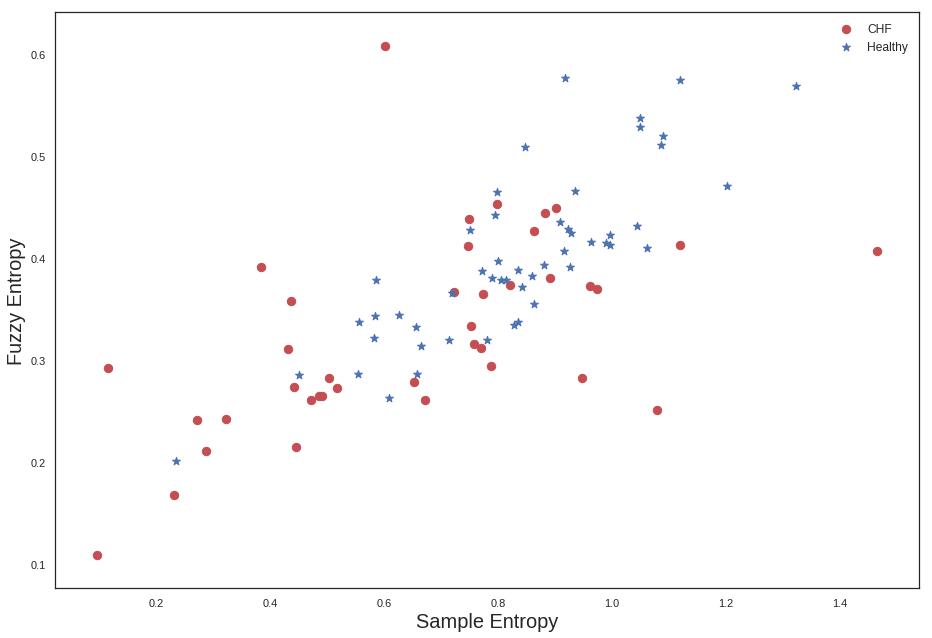

In [15]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(dormidosCHF['SampleEntropy'],dormidosCHF['FuzzyEntropy'],c='r',marker='o',s=70);
axes.scatter(dormidosH['SampleEntropy'],dormidosH['FuzzyEntropy'],c='b',marker='*',s=70);

plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Sample Entropy',fontsize=20)
plt.ylabel('Fuzzy Entropy',fontsize=20)

Text(0, 0.5, 'Ap Entropy')

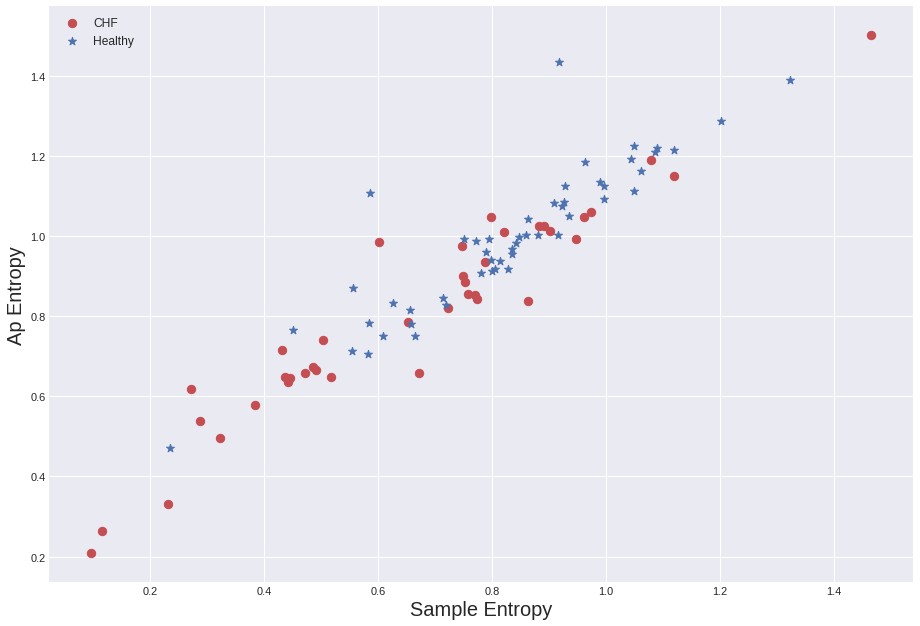

In [16]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(dormidosCHF['SampleEntropy'],dormidosCHF['ApEntropy'],c='r',marker='o',s=70);
axes.scatter(dormidosH['SampleEntropy'],dormidosH['ApEntropy'],c='b',marker='*',s=70);

plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Sample Entropy',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

Text(0, 0.5, 'Fuzzy Entropy')

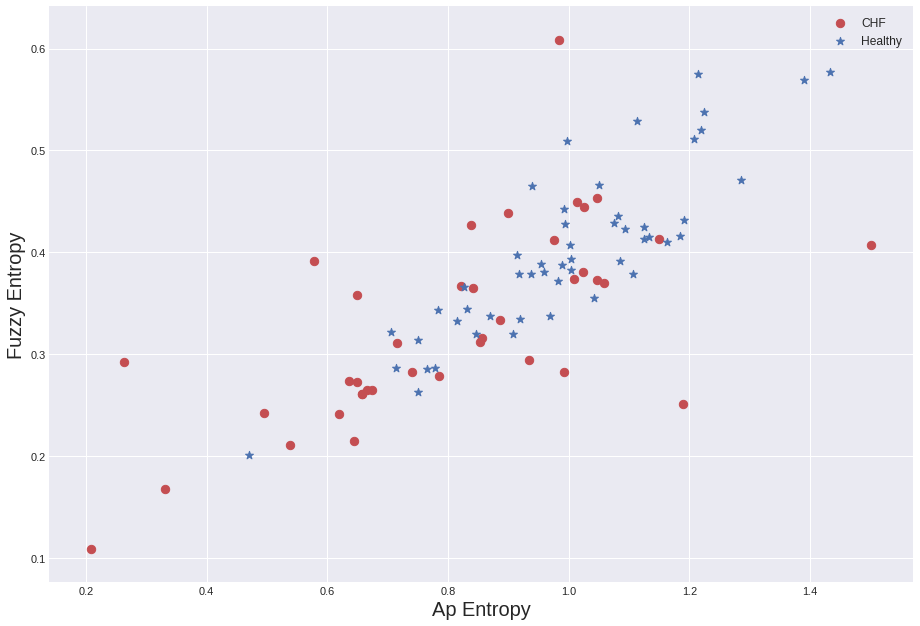

In [17]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(dormidosCHF['ApEntropy'],dormidosCHF['FuzzyEntropy'],c='r',marker='o',s=70);
axes.scatter(dormidosH['ApEntropy'],dormidosH['FuzzyEntropy'],c='b',marker='*',s=70);

plt.legend(['CHF','Healthy'],fontsize=12)
plt.xlabel('Ap Entropy',fontsize=20)
plt.ylabel('Fuzzy Entropy',fontsize=20)

/home/eric/anaconda3/envs/tesina/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


<Figure size 432x288 with 0 Axes>

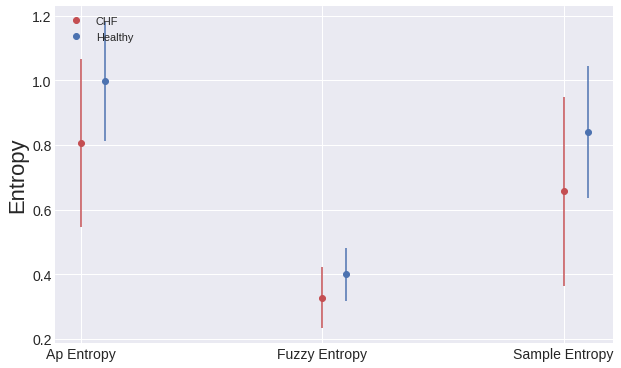

In [18]:
meansDormidosChf = [dormidosCHF['ApEntropy'].mean(),dormidosCHF['FuzzyEntropy'].mean(),dormidosCHF['SampleEntropy'].mean()]
stdDormidosChf = [dormidosCHF['ApEntropy'].std(),dormidosCHF['FuzzyEntropy'].std(),dormidosCHF['SampleEntropy'].std()]

meansDormidosH = [dormidosH['ApEntropy'].mean(),dormidosH['FuzzyEntropy'].mean(),dormidosH['SampleEntropy'].mean()]
stdDormidosH = [dormidosH['ApEntropy'].std(),dormidosH['FuzzyEntropy'].std(),dormidosH['SampleEntropy'].std()]


xAct = [0,1,2]
xLow = [0.1,1.1,2.1]


# example variable error bar values
x=[0,1,2]


plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
plt.figure(figsize=[10,6.2])
for i in range(len(meansDormidosChf)):
    plt.plot(xAct[i],meansDormidosChf[i],'ro')
    plt.errorbar(xAct[i],meansDormidosChf[i], yerr=stdDormidosChf[i],ecolor='r')
    
    plt.plot(xLow[i],meansDormidosH[i],'bo')
    plt.errorbar(xLow[i],meansDormidosH[i], yerr=stdDormidosH[i],ecolor='b')

xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 14)
plt.xticks(x,xt,fontsize=14)
plt.ylabel('Entropy',fontsize = 22)
plt.legend(['CHF','Healthy'],loc='upper left')
    
# First illustrate basic pyplot interface, using defaults where possible.

# Gráficas comparativas entre entropias en pruebas de esfuerzo <a id="4"></a>

In [6]:
jovenes=pd.read_csv('/home/eric/Documents/TimeSeries/SERIES_DE_TIEMPO_COMPLETO/SeriesArticuloEntropy/metadataJovenes.csv')
adultos=pd.read_csv('/home/eric/Documents/TimeSeries/SERIES_DE_TIEMPO_COMPLETO/SeriesArticuloEntropy/metadataAdultos.csv')

print(len(jovenes))
print(len(adultos))

31
8


In [16]:
adultosHigh=adultos.loc[adultos['Cuestionario']=='HIGH']
jovenesHigh=jovenes.loc[jovenes['Cuestionario']=='HIGH']
adultosLow=adultos.loc[adultos['Cuestionario']=='LOW']
jovenesLow=jovenes.loc[jovenes['Cuestionario']=='LOW']
jovenesHigh

,Genero,Persona,Edad,Talla,Peso,IMC,Cuestionario,ReposoSamp,3.5MPHSamp,4MPHSamp,...,4MPHAp,PendienteAp,AVGr,PNN50r,RMSSDr,SDNNr,AVGp,PNN50p,RMSSDp,SDNNp
8,H,Edgar,21,1.80,72.0,22.222220,HIGH,0.8635,1.1731,1.1539,...,1.0793,0.2510,0.624805,0.044966,0.048860,0.048019,0.519125,0.000000,0.008159,0.018516
9,H,enrique 1,23,1.72,73.0,24.675500,HIGH,1.3663,1.8354,1.3585,...,1.0321,-0.1658,0.839953,0.077224,0.031659,0.061385,0.532680,0.002933,0.011927,0.028793
10,H,enrique 2,23,1.72,73.0,24.675500,HIGH,1.1434,1.5081,1.3231,...,1.0940,-0.0607,0.868297,0.169110,0.037462,0.080737,0.525594,0.001955,0.010328,0.023218
11,H,enrique 3,23,1.72,73.0,24.675500,HIGH,0.9828,0.7841,0.3081,...,0.5312,-0.4641,0.758305,0.043988,0.059873,0.064302,0.615844,0.267840,0.277208,0.203213
12,H,Jardi,22,1.75,66.0,21.551020,HIGH,0.7543,1.3291,1.0608,...,1.1789,0.0066,0.668625,0.198436,0.051698,0.105750,0.462742,0.000978,0.008430,0.021342
14,H,Jorge,21,1.80,85.0,26.234568,HIGH,0.6985,0.9581,0.7908,...,0.9476,-0.0038,0.696195,0.130987,0.046978,0.080610,0.425719,0.002933,0.010064,0.008827


Text(0, 0.5, 'Magnitude')

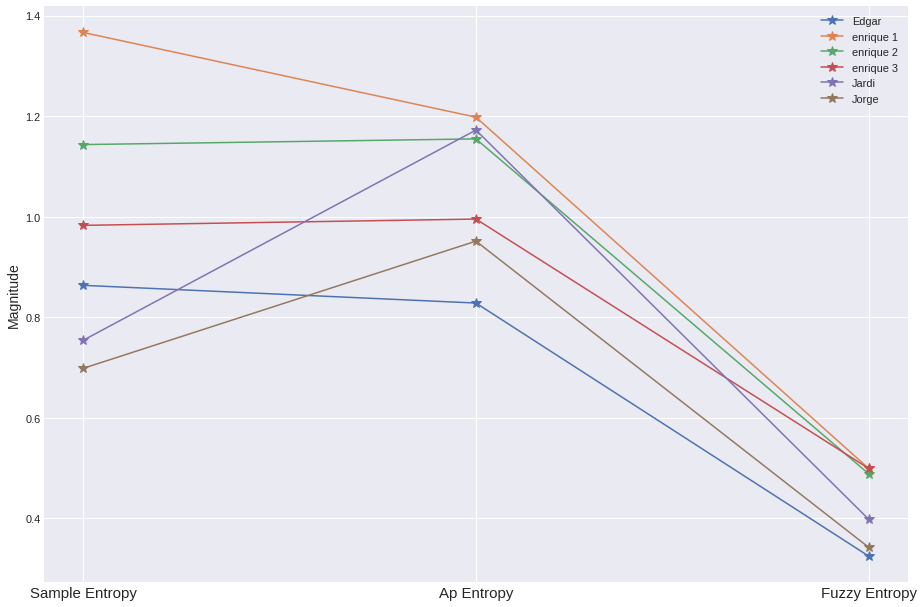

In [21]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1,2]
xt=['Sample Entropy','Ap Entropy','Fuzzy Entropy']
for index,row in jovenesHigh.iterrows():
    jov=[row['ReposoSamp'],row['ReposoAp'],row['ReposoFuzz']]
    axes.plot(jov, '*-', markersize=10)
axes.legend(jovenesHigh['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Magnitude',fontsize=14)

Text(0, 0.5, 'Magnitude')

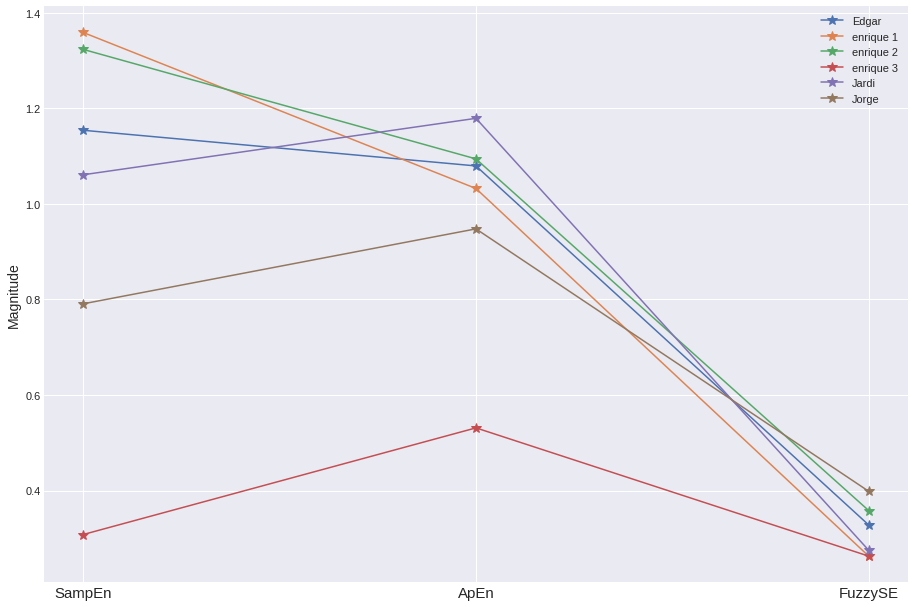

In [22]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1,2]
xt=['SampEn','ApEn','FuzzySE']
for index,row in jovenesHigh.iterrows():
    jov=[float(row['4MPHSamp']),float(row['4MPHAp']),float(row['4MPHFuzz'])]
    axes.plot(jov, '*-', markersize=10)
axes.legend(jovenesHigh['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Magnitude',fontsize=14)

# Gráficas de repetibilidad de los métodos <a id="5"></a>

(array([0, 1]), <a list of 2 Text xticklabel objects>)

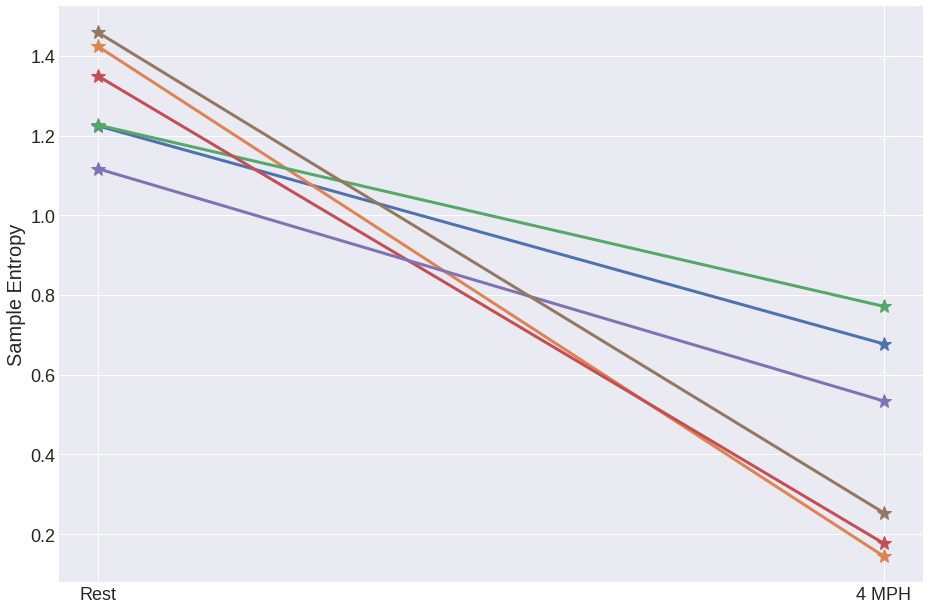

In [22]:
Amparo=jovenes[jovenes['Persona'].str.contains("Amp")]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1]
xt=['Rest','4 MPH',]
for index,row in Amparo.iterrows():
    jov=[float(row['ReposoSamp']),float(row['4MPHSamp'])]
    axes.plot(jov, '*-', markersize=14, lw=3)
# axes.legend(Amparo['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Sample Entropy',fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)


(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

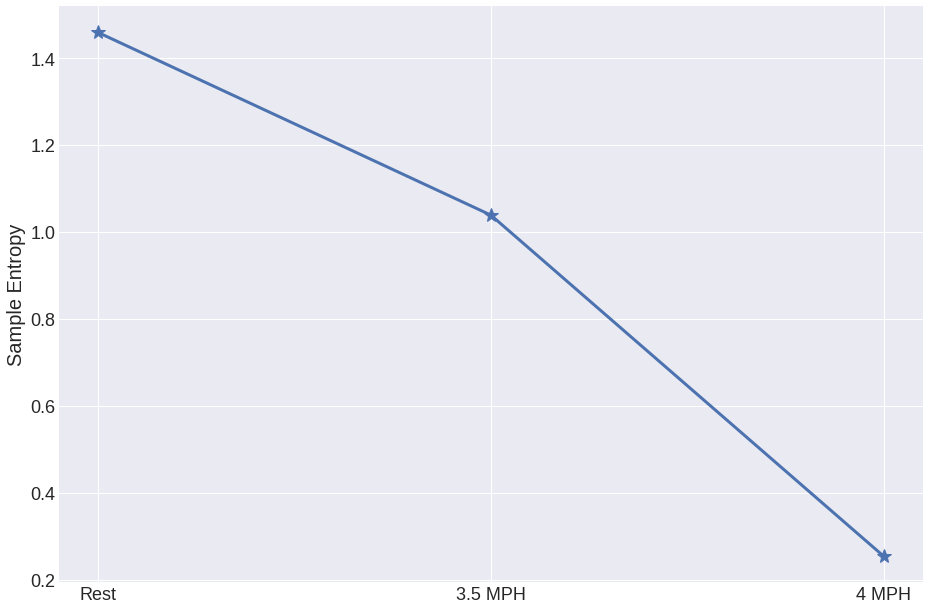

In [23]:
Amparo=jovenes[jovenes['Persona'].str.contains("Amp")]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1,2]
xt=['Rest','3.5 MPH','4 MPH',]

jov=[float(row['ReposoSamp']),float(row['3.5MPHSamp']),float(row['4MPHSamp'])]
axes.plot(jov, '*-', markersize=14, lw=3)
# axes.legend(Amparo['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Sample Entropy',fontsize=20)
plt.yticks(fontsize = 18)
plt.xticks(fontsize = 18)

In [24]:
Amparo

,Genero,Persona,Edad,Talla,Peso,IMC,Cuestionario,ReposoSamp,3.5MPHSamp,4MPHSamp,...,4MPHAp,PendienteAp,AVGr,PNN50r,RMSSDr,SDNNr,AVGp,PNN50p,RMSSDp,SDNNp
0,M,Amparo2,22,1.55,48.0,19.979188,LOW,1.2246,0.1814,0.6777,...,0.8773,-0.5719,0.827102,0.325513,0.055137,0.060082,0.400148,0.000000,0.006198,0.011765
1,M,Amparo3,22,1.55,48.0,19.979188,LOW,1.4239,0.1370,0.145,...,0.1946,-1.1138,0.668367,0.156403,0.039949,0.053411,0.447398,0.035191,0.121386,0.086467
3,M,Amparo5,22,1.55,48.0,19.979188,LOW,1.2267,1.8386,0.7719,...,0.6022,-1.1351,0.806219,0.291300,0.057789,0.078291,0.428664,0.000000,0.006357,0.012745
4,M,Amparo6,22,1.55,48.0,19.979188,LOW,1.3495,0.8812,0.1772,...,0.2620,-0.9780,0.684028,0.097952,0.030769,0.043573,0.469297,0.067449,0.141092,0.097246
5,M,Amparo7,22,1.55,48.0,19.979188,LOW,1.1170,1.7558,0.5345,...,0.6698,-0.3872,0.731750,0.063539,0.028946,0.058900,0.531367,0.007820,0.017392,0.027319
6,M,Amparo8,22,1.55,48.0,19.979188,LOW,1.4590,1.0388,0.254,...,0.3600,-0.9093,0.896938,0.438905,0.072224,0.083673,0.490055,0.086022,0.145969,0.104154


Text(0, 0.5, 'Fuzzy Sample Entropy')

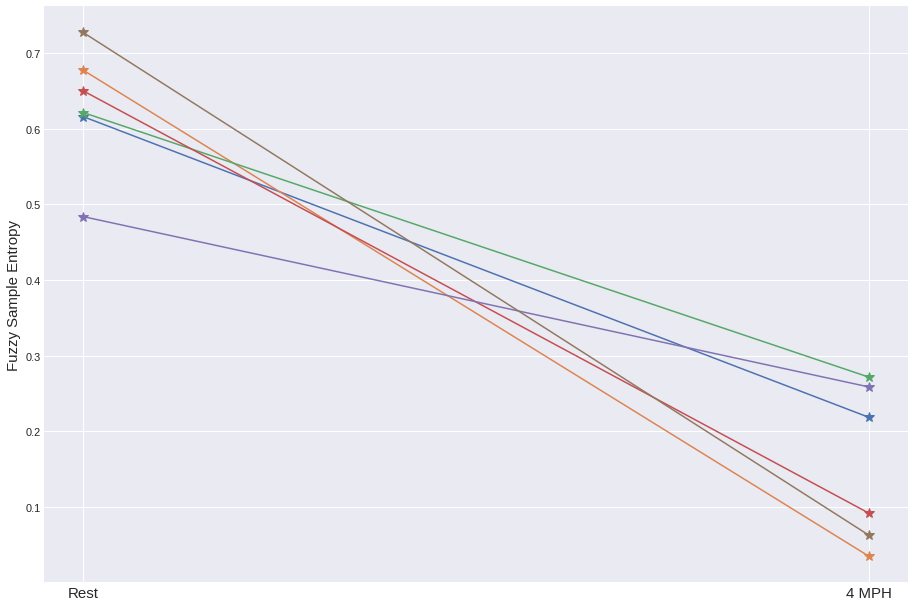

In [25]:

Amparo=jovenes[jovenes['Persona'].str.contains("Amp")]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1]
xt=['Rest','4 MPH',]
for index,row in Amparo.iterrows():
    jov=[float(row['ReposoFuzz']),float(row['4MPHFuzz'])]
    axes.plot(jov, '*-', markersize=10)
# axes.legend(Amparo['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Fuzzy Sample Entropy',fontsize=15)

[1.4492, 0.8773]
[1.3084, 0.1946]
[1.7373, 0.6022]
[1.24, 0.262]
[1.057, 0.6698]
[1.2693, 0.36]


Text(0, 0.5, 'Ap Entropy')

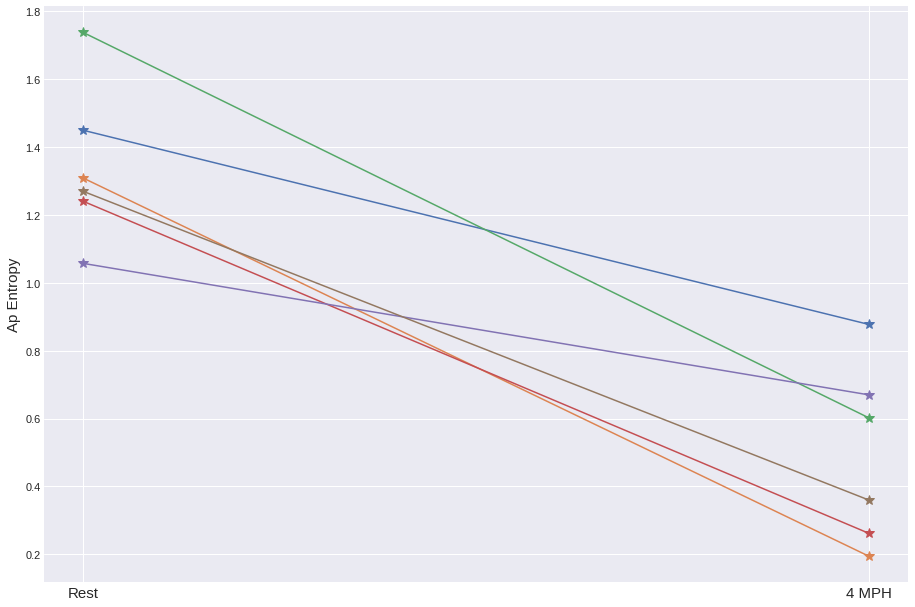

In [26]:
Amparo=jovenes[jovenes['Persona'].str.contains("Amp")]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1]
xt=['Rest','4 MPH',]
for index,row in Amparo.iterrows():
    jov=[float(row['ReposoAp']),float(row['4MPHAp'])]
    print(jov)
    axes.plot(jov, '*-', markersize=10)
# axes.legend(Amparo['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Ap Entropy',fontsize=15)

# Cambio de entropia en pruebas de esfuerzo <a id="6"></a>

Text(0, 0.5, 'Sample Entropy')

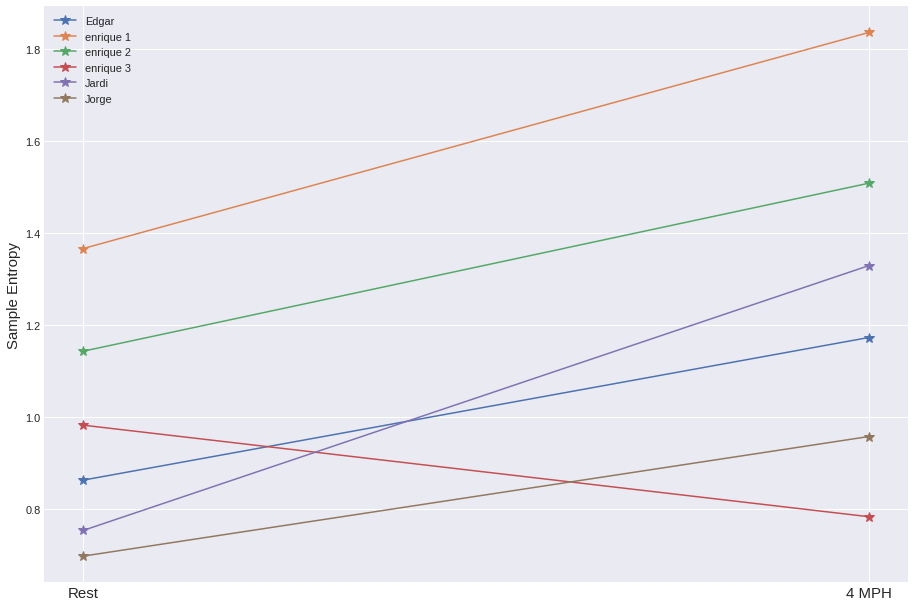

In [27]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1]
xt=['Rest','4 MPH']
Jov=jovenes[jovenes['Cuestionario']=="HIGH"]
for index,row in Jov.iterrows():
    if row['4MPH'=='?']:
        jov=[float(row['ReposoSamp']),float(row['3.5MPHSamp'])]
    else:
        jov=[float(row['ReposoSamp']),float(row['4MPHSamp'])]
    axes.plot(jov, '*-', markersize=10)
axes.legend(Jov['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Sample Entropy',fontsize=15)

In [25]:
print(Jov[Jov['Persona']=='enrique 3'])

   Genero    Persona  Edad  Talla  Peso       IMC Cuestionario  ReposoSamp  \
11      H  enrique 3    23   1.72   73.0  24.6755         HIGH      0.9828   

    3.5MPHSamp 4MPHSamp    ...     4MPHAp  PendienteAp      AVGr    PNN50r  \
11      0.7841   0.3081    ...     0.5312      -0.4641  0.758305  0.043988   

      RMSSDr     SDNNr      AVGp   PNN50p    RMSSDp     SDNNp  
11  0.059873  0.064302  0.615844  0.26784  0.277208  0.203213  

[1 rows x 27 columns]


Text(0, 0.5, 'Sample Entropy')

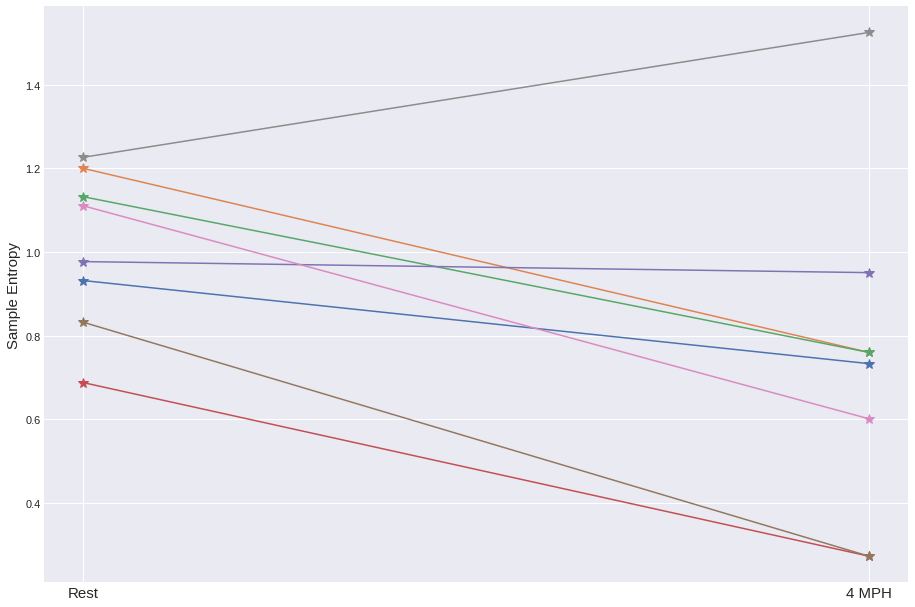

In [26]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
x=[0,1]
plt.style.use('seaborn-darkgrid')

xt=['Rest','4 MPH']
for index,row in adultos.iterrows():
    if row['4MPH'=='?']:
        jov=[float(row['ReposoAp']),float(row['3.5MPHAp'])]
    else:
        jov=[float(row['ReposoAp']),float(row['4MPHAp'])]
    axes.plot(jov, '*-', markersize=10)
# axes.legend(adultos['Persona'])
plt.xticks(x,xt,fontsize=15)
plt.title('',fontsize=16)
plt.ylabel('Sample Entropy',fontsize=15)


## Jovenes Activos  

Text(0, 0.5, 'Entropy')

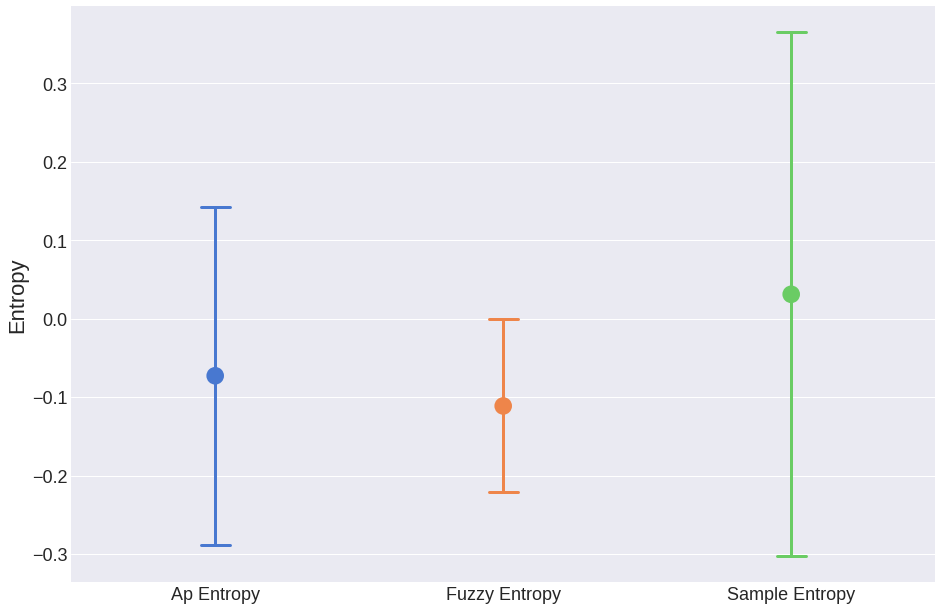

In [28]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
df = jovenesHigh[['PendienteAp', 'PendienteFuzz', 'PendienteSamp']]
sns.pointplot(data=df, dodge=True, join=False, ci='sd',
              palette='muted',capsize=.1, errwidth =3,scale=2, marker ='*')
x=[0,1,2]
xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 18)
plt.xticks(x,xt,fontsize=18)
plt.ylabel('Entropy',fontsize = 22)

## Jovenes sedentarios

Text(0, 0.5, 'Entropy')

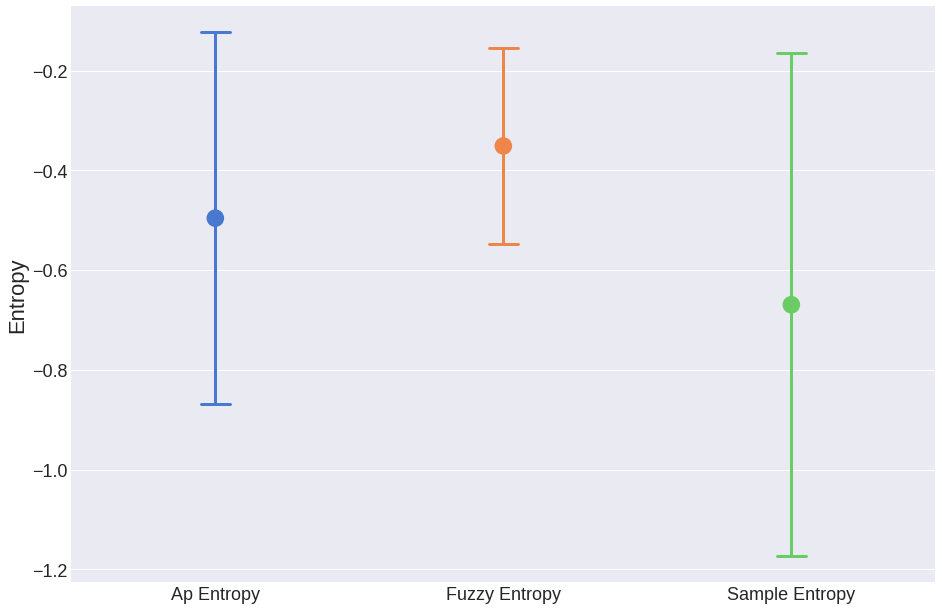

In [30]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
df = jovenesLow[['PendienteAp', 'PendienteFuzz', 'PendienteSamp']]
sns.pointplot(data=df, dodge=True, join=False, ci='sd',
              palette='muted',capsize=.1, errwidth =3,scale=2)
x=[0,1,2]
xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 18)
plt.xticks(x,xt,fontsize=18)
plt.ylabel('Entropy',fontsize = 22)

## Total Activos 

Text(0, 0.5, 'Entropy')

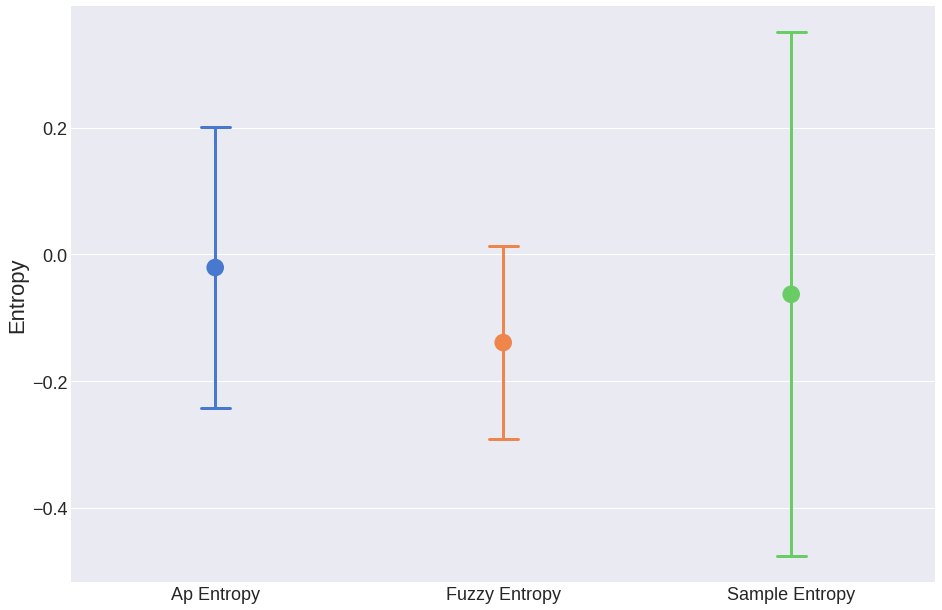

In [34]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
df = ActComplete[['PendienteAp', 'PendienteFuzz', 'PendienteSamp']]
sns.pointplot(data=df, dodge=True, join=False, ci='sd',
              palette='muted',capsize=.1, errwidth =3,scale=2)
x=[0,1,2]
xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 18)
plt.xticks(x,xt,fontsize=18)
plt.ylabel('Entropy',fontsize = 22)

## Total sedentarios 

Text(0, 0.5, 'Entropy')

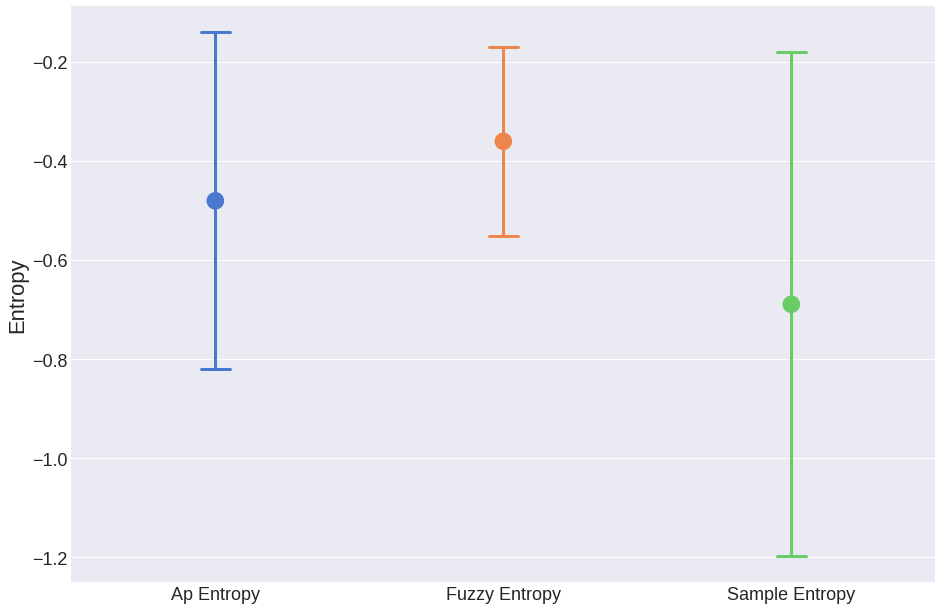

In [35]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
df = LowComplete[['PendienteAp', 'PendienteFuzz', 'PendienteSamp']]
sns.pointplot(data=df, dodge=True, join=False, ci='sd',
              palette='muted',capsize=.1, errwidth =3,scale=2)
x=[0,1,2]
xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 18)
plt.xticks(x,xt,fontsize=18)
plt.ylabel('Entropy',fontsize = 22)

/home/eric/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


<Figure size 432x288 with 0 Axes>

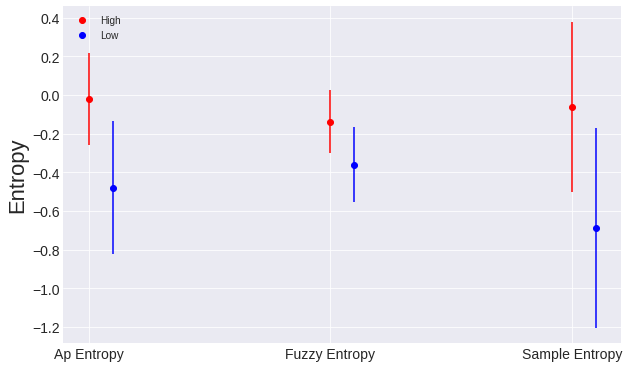

In [19]:
meansAct = [ActComplete['PendienteAp'].mean(),ActComplete['PendienteFuzz'].mean(),ActComplete['PendienteSamp'].mean()]
stdAct = [ActComplete['PendienteAp'].std(),ActComplete['PendienteFuzz'].std(),ActComplete['PendienteSamp'].std()]

meansLow = [LowComplete['PendienteAp'].mean(),LowComplete['PendienteFuzz'].mean(),LowComplete['PendienteSamp'].mean()]
stdLow = [LowComplete['PendienteAp'].std(),LowComplete['PendienteFuzz'].std(),LowComplete['PendienteSamp'].std()]


xAct = [0,1,2]
xLow = [0.1,1.1,2.1]


# example variable error bar values
x=[0,1,2]


plt.figure()
axes = fig.add_axes([0.1,0.1,2,2])
plt.figure(figsize=[10,6.2])
for i in range(len(meansAct)):
    plt.plot(xAct[i],meansAct[i],'ro')
    plt.errorbar(xAct[i],meansAct[i], yerr=stdAct[i],ecolor='r')
    plt.plot(xLow[i],meansLow[i],'bo')
    plt.errorbar(xLow[i],meansLow[i], yerr=stdLow[i],ecolor='b')

xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 14)
plt.xticks(x,xt,fontsize=14)
plt.ylabel('Entropy',fontsize = 22)
plt.legend(['High','Low'],loc='upper left')
    
# First illustrate basic pyplot interface, using defaults where possible.

In [ ]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
sns.pointplot(data=df, dodge=True, join=False, ci='sd',
              palette='muted',capsize=.1, errwidth =3,scale=2)
x=[0,1,2]
xt=['Ap Entropy' , 'Fuzzy Entropy', 'Sample Entropy']
plt.yticks(fontsize = 18)
plt.xticks(x,xt,fontsize=18)
plt.ylabel('Entropy',fontsize = 22)

In [77]:
jovenesHigh[['Persona','PendienteAp','PendienteFuzz', 'PendienteSamp']]

,Persona,PendienteAp,PendienteFuzz,PendienteSamp
8,Edgar,0.2510,0.0030,0.2904
9,enrique 1,-0.1658,-0.2365,-0.0078
10,enrique 2,-0.0607,-0.1305,0.1797
11,enrique 3,-0.4641,-0.2365,-0.6747
12,Jardi,0.0066,-0.1232,0.3065
14,Jorge,-0.0038,0.0560,0.0923


Text(0, 0.5, 'AP Entropy')

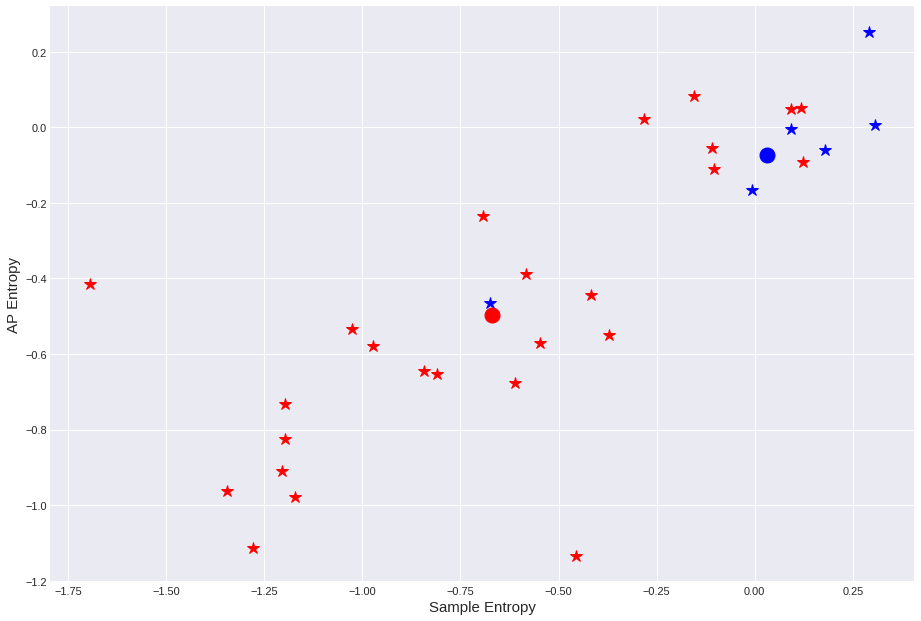

In [29]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
Act=jovenes[jovenes['Cuestionario']=='HIGH']
Sed=jovenes[jovenes['Cuestionario']=='LOW']
axes.plot(Act['PendienteSamp'],Act['PendienteAp'],'*',markersize=12,color='blue')

axes.plot(Sed['PendienteSamp'],Sed['PendienteAp'],'*',markersize=12,color='red')
axes.plot(Sed['PendienteSamp'].mean(),Sed['PendienteAp'].mean(),'o',markersize=15,color='red')
axes.plot(Act['PendienteSamp'].mean(),Act['PendienteAp'].mean(),'o',markersize=15,color='blue')

plt.title('',fontsize=16)
plt.xlabel('Sample Entropy',fontsize=15)
plt.ylabel('AP Entropy',fontsize=15)

# Gráficas de entropia vs entropia en pruebas de esfuerzo  <a id="7"></a>

Text(0, 0.5, 'Fuzzy Entropy')

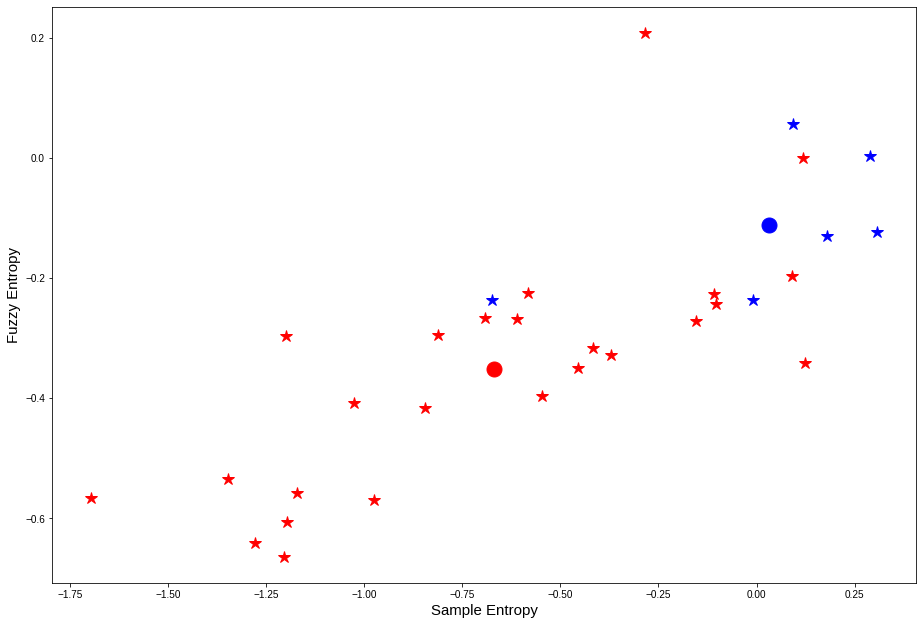

In [8]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
Act=jovenes[jovenes['Cuestionario']=='HIGH']
Sed=jovenes[jovenes['Cuestionario']=='LOW']

axes.plot(Sed['PendienteSamp'],Sed['PendienteFuzz'],'*',markersize=12,color='red')
axes.plot(Act['PendienteSamp'],Act['PendienteFuzz'],'*',markersize=12,color='blue')

axes.plot(Sed['PendienteSamp'].mean(),Sed['PendienteFuzz'].mean(),'o',markersize=15,color='red')
axes.plot(Act['PendienteSamp'].mean(),Act['PendienteFuzz'].mean(),'o',markersize=15,color='blue')


plt.title('',fontsize=16)
plt.xlabel('Sample Entropy',fontsize=15)
plt.ylabel('Fuzzy Entropy',fontsize=15)

Text(0, 0.5, 'AP Entropy')

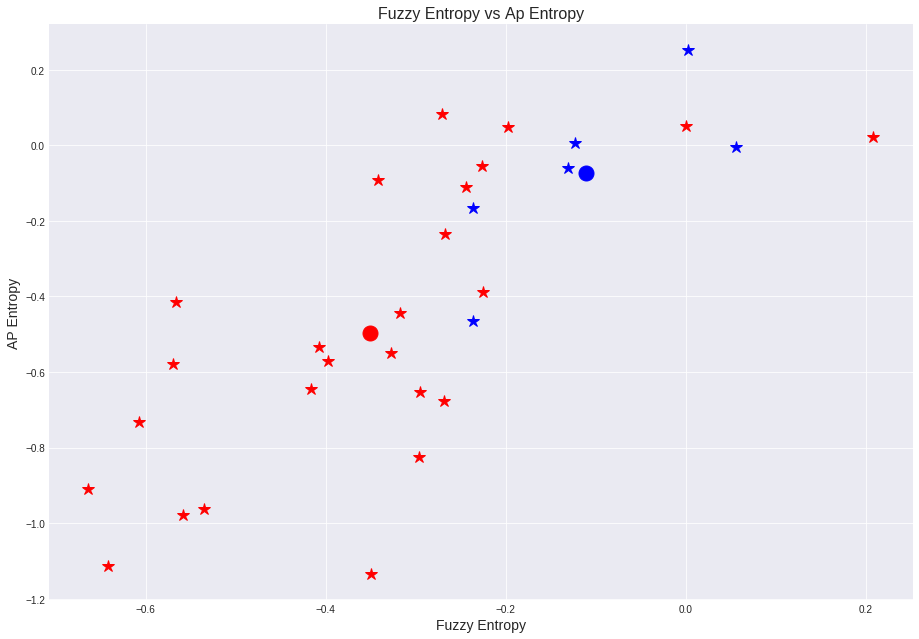

In [11]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
Act=jovenes[jovenes['Cuestionario']=='HIGH']
Sed=jovenes[jovenes['Cuestionario']=='LOW']

axes.plot(Act['PendienteFuzz'],Act['PendienteAp'],'*',markersize=12,color='blue')
axes.plot(Sed['PendienteFuzz'],Sed['PendienteAp'],'*',markersize=12,color='red')

axes.plot(Act['PendienteFuzz'].mean(),Act['PendienteAp'].mean(),'o',markersize=15,color='blue')
axes.plot(Sed['PendienteFuzz'].mean(),Sed['PendienteAp'].mean(),'o',markersize=15,color='red')


plt.title('Fuzzy Entropy vs Ap Entropy',fontsize=16)
plt.xlabel('Fuzzy Entropy',fontsize=14)
plt.ylabel('AP Entropy',fontsize=14)

Text(0, 0.5, 'AP Entropy')

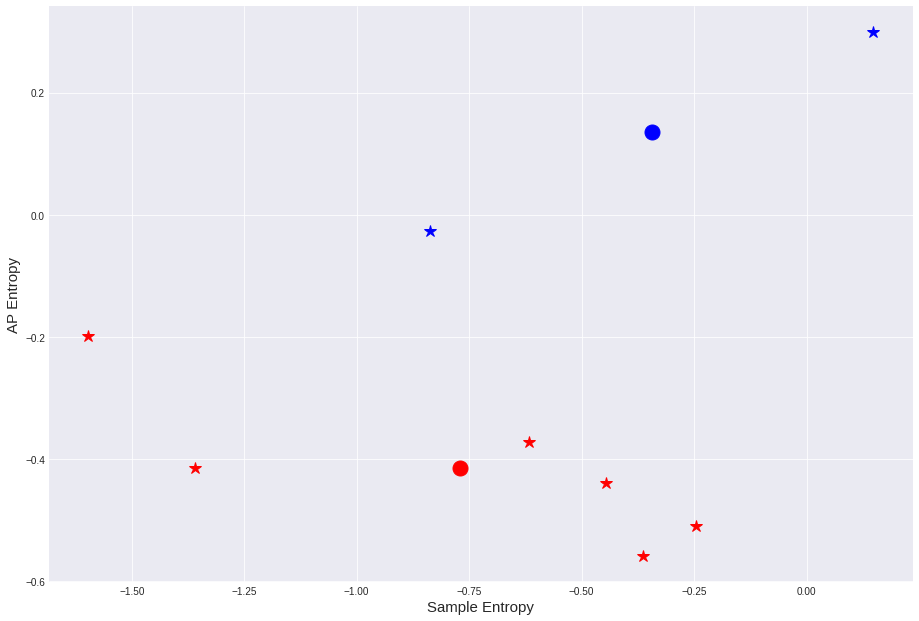

In [12]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
Act=adultos[adultos['Cuestionario']=='HIGH']
Sed=adultos[adultos['Cuestionario']=='LOW']
axes.plot(Act['PendienteSamp'],Act['PendienteAp'],'*',markersize=12,color='blue')

axes.plot(Sed['PendienteSamp'],Sed['PendienteAp'],'*',markersize=12,color='red')
axes.plot(Sed['PendienteSamp'].mean(),Sed['PendienteAp'].mean(),'o',markersize=15,color='red')
axes.plot(Act['PendienteSamp'].mean(),Act['PendienteAp'].mean(),'o',markersize=15,color='blue')

plt.title('',fontsize=16)
plt.xlabel('Sample Entropy',fontsize=15)
plt.ylabel('AP Entropy',fontsize=15)

In [18]:
Jlow= jovenesLow.copy()
LowComplete= Jlow.append(adultos[adultos['Cuestionario']=='LOW'])
# ActComplete


Jact= jovenesHigh.copy()
ActComplete= Jact.append(adultos[adultos['Cuestionario']=='HIGH'])
# ActComplete

/home/eric/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


Text(0, 0.5, 'AP Entropy')

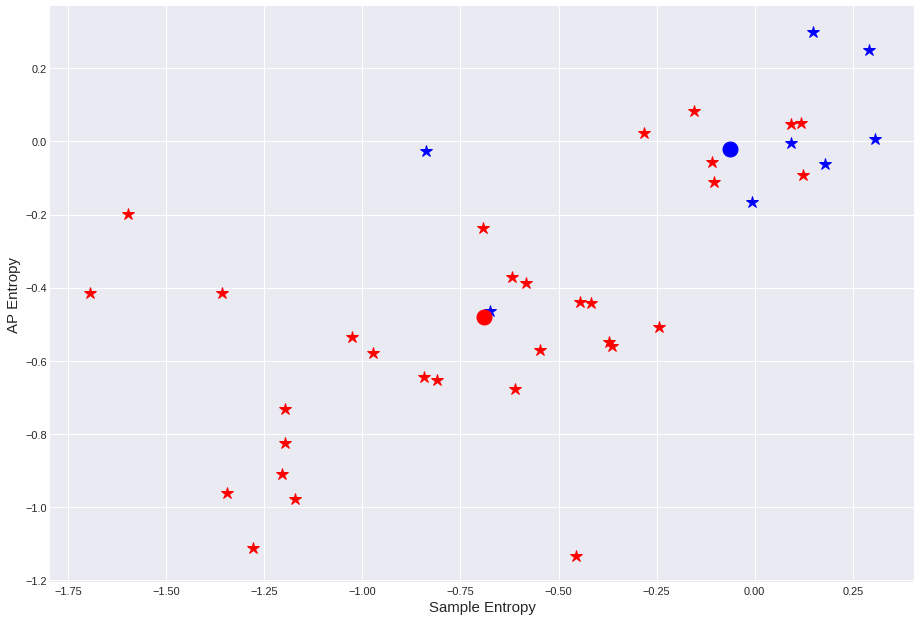

In [34]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
# Act=jovenes[jovenes['Cuestionario']=='HIGH']
# Sed=jovenes[jovenes['Cuestionario']=='LOW']
axes.plot(ActComplete['PendienteSamp'],ActComplete['PendienteAp'],'*',markersize=12,color='blue')

axes.plot(LowComplete['PendienteSamp'],LowComplete['PendienteAp'],'*',markersize=12,color='red')
axes.plot(LowComplete['PendienteSamp'].mean(),LowComplete['PendienteAp'].mean(),'o',markersize=15,color='red')
axes.plot(ActComplete['PendienteSamp'].mean(),ActComplete['PendienteAp'].mean(),'o',markersize=15,color='blue')

plt.title('',fontsize=16)
plt.xlabel('Sample Entropy',fontsize=15)
plt.ylabel('AP Entropy',fontsize=15)

Text(0, 0.5, 'AP Entropy')

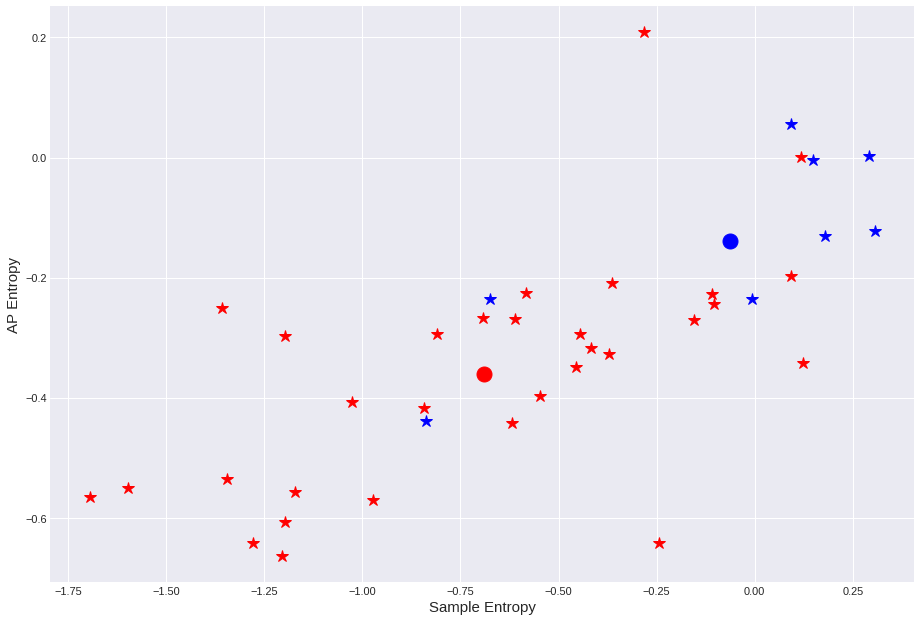

In [35]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
# Act=jovenes[jovenes['Cuestionario']=='HIGH']
# Sed=jovenes[jovenes['Cuestionario']=='LOW']
axes.plot(ActComplete['PendienteSamp'],ActComplete['PendienteFuzz'],'*',markersize=12,color='blue')

axes.plot(LowComplete['PendienteSamp'],LowComplete['PendienteFuzz'],'*',markersize=12,color='red')
axes.plot(LowComplete['PendienteSamp'].mean(),LowComplete['PendienteFuzz'].mean(),'o',markersize=15,color='red')
axes.plot(ActComplete['PendienteSamp'].mean(),ActComplete['PendienteFuzz'].mean(),'o',markersize=15,color='blue')

plt.title('',fontsize=16)
plt.xlabel('Sample Entropy',fontsize=15)
plt.ylabel('AP Entropy',fontsize=15)

In [36]:
jovenes.head()

,Genero,Persona,Edad,Talla,Peso,IMC,Cuestionario,ReposoSamp,3.5MPHSamp,4MPHSamp,...,4MPHAp,PendienteAp,AVGr,PNN50r,RMSSDr,SDNNr,AVGp,PNN50p,RMSSDp,SDNNp
0,M,Amparo2,22,1.55,48.0,19.979188,LOW,1.2246,0.1814,0.6777,...,0.8773,-0.5719,0.827102,0.325513,0.055137,0.060082,0.400148,0.000000,0.006198,0.011765
1,M,Amparo3,22,1.55,48.0,19.979188,LOW,1.4239,0.1370,0.145,...,0.1946,-1.1138,0.668367,0.156403,0.039949,0.053411,0.447398,0.035191,0.121386,0.086467
2,M,amparo4,22,1.55,48.0,19.979188,LOW,1.6778,1.9360,0.4804,...,0.5838,-0.7321,0.760648,0.281525,0.048765,0.068671,0.522531,0.006843,0.054136,0.043902
3,M,Amparo5,22,1.55,48.0,19.979188,LOW,1.2267,1.8386,0.7719,...,0.6022,-1.1351,0.806219,0.291300,0.057789,0.078291,0.428664,0.000000,0.006357,0.012745
4,M,Amparo6,22,1.55,48.0,19.979188,LOW,1.3495,0.8812,0.1772,...,0.2620,-0.9780,0.684028,0.097952,0.030769,0.043573,0.469297,0.067449,0.141092,0.097246


# Variabilidad Cardiaca  <a id="8"></a>

## AVGr

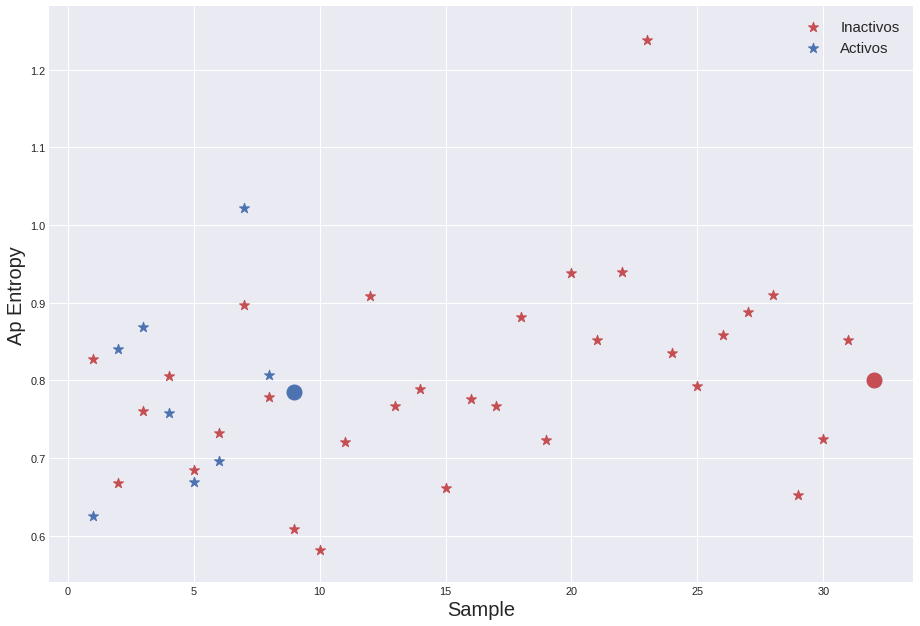

In [37]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['AVGr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['AVGr'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['AVGr']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['AVGr']),c='b',marker='o',markersize=15)

## PNN50r

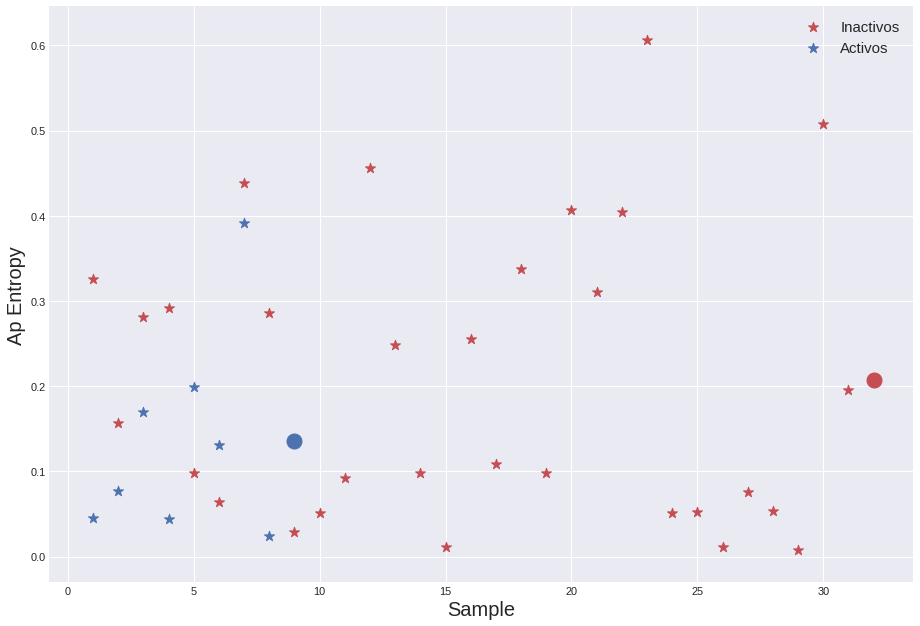

In [38]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['PNN50r'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['PNN50r'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['PNN50r']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['PNN50r']),c='b',marker='o',markersize=15)

## RMSSDr

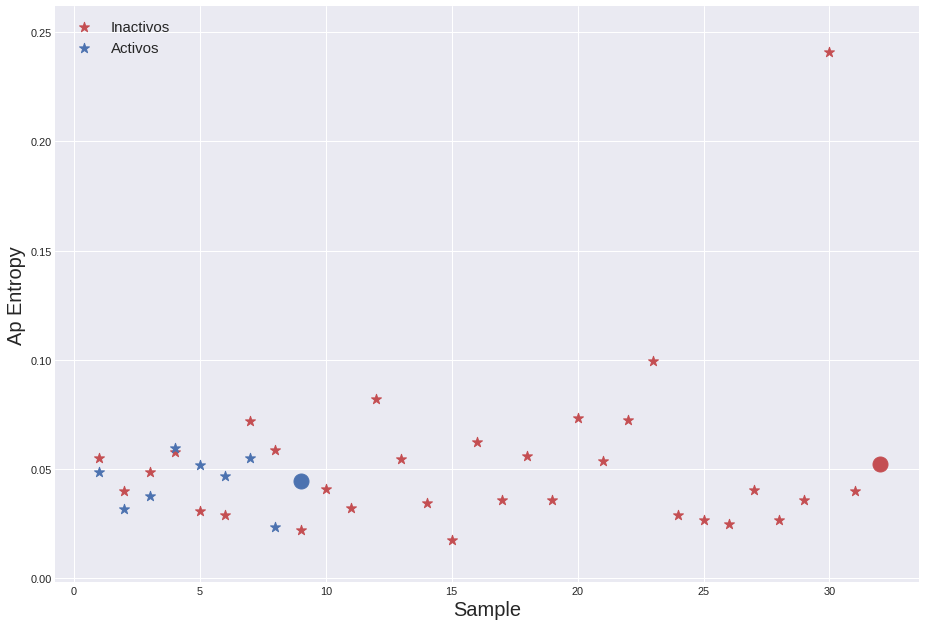

In [39]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['RMSSDr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['RMSSDr'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['RMSSDr']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['RMSSDr']),c='b',marker='o',markersize=15)

## SDNNr

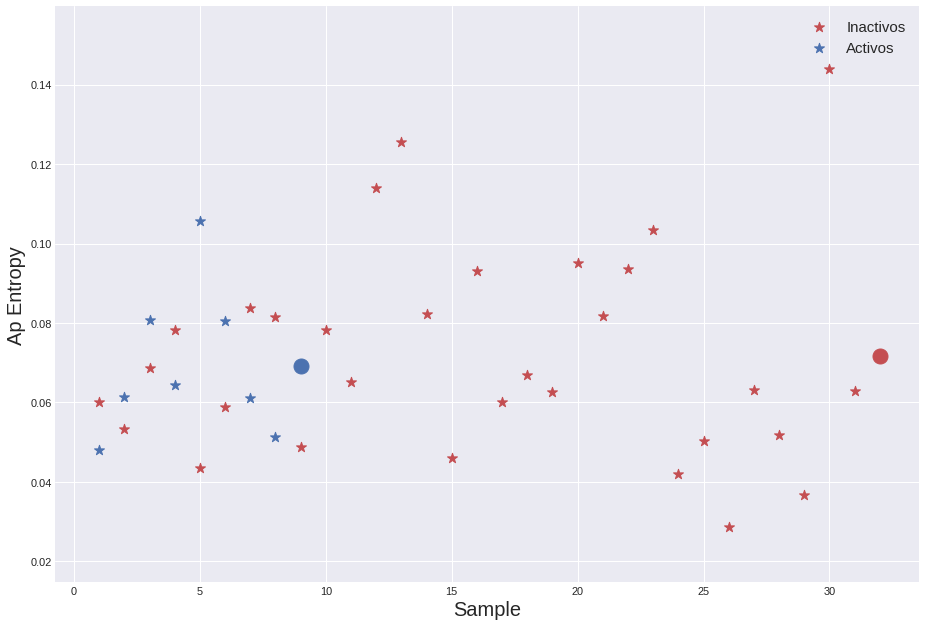

In [40]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['SDNNr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['SDNNr'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['SDNNr']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['SDNNr']),c='b',marker='o',markersize=15)

## AVGp

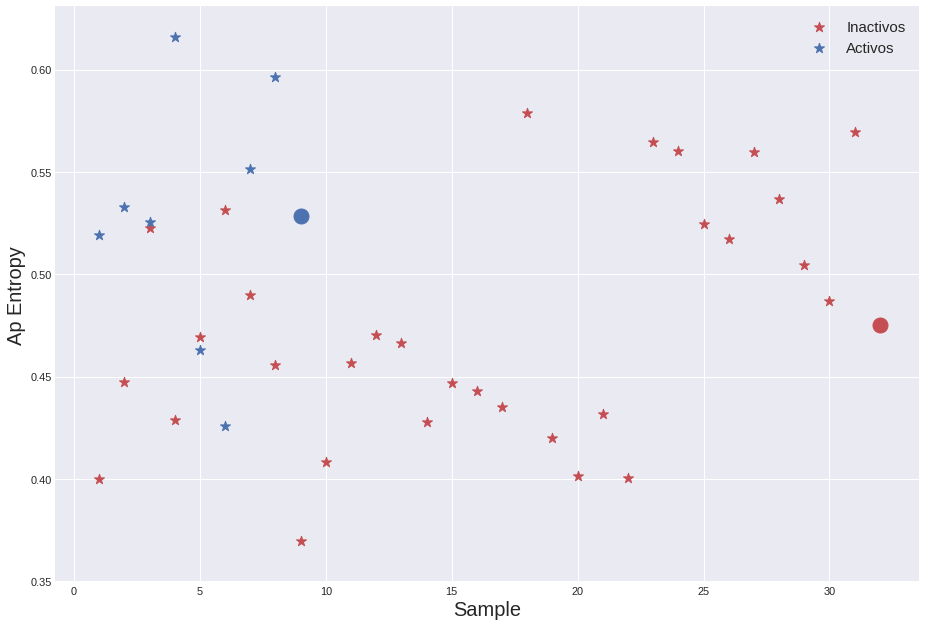

In [41]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['AVGp'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['AVGp'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['AVGp']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['AVGp']),c='b',marker='o',markersize=15)

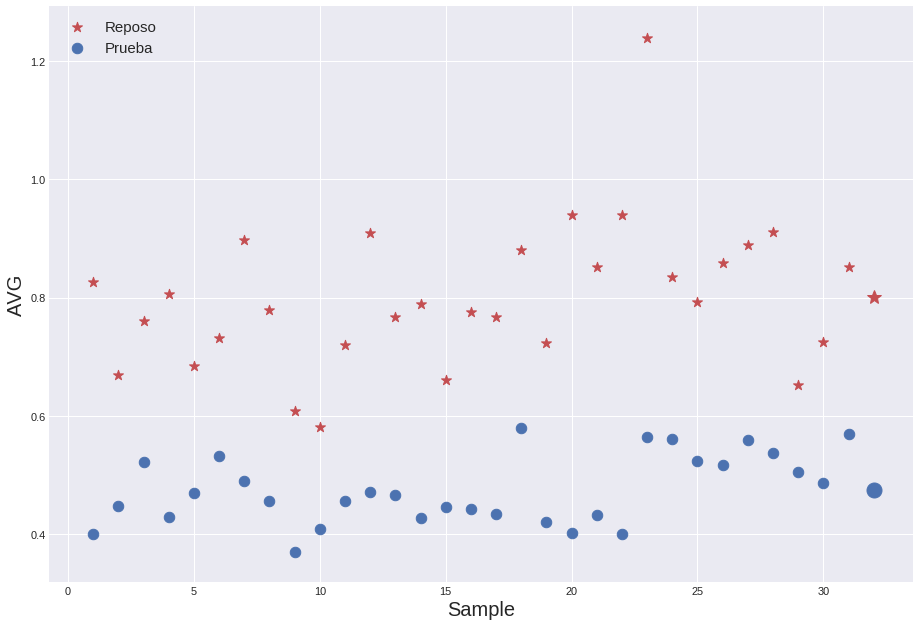

In [42]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['AVGr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['AVGp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('AVG',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['AVGr']),c='r',marker='*',markersize=15)
axes.plot(len(LowComplete)+1,np.mean(LowComplete['AVGp']),c='b',marker='o',markersize=15)

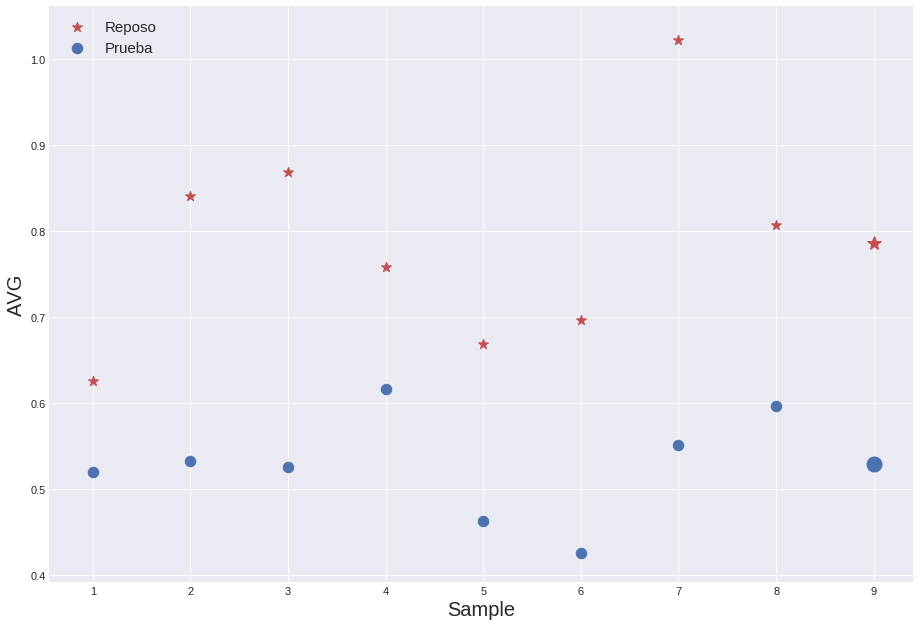

In [43]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['AVGr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['AVGp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('AVG',fontsize=20)

axes.plot(len(ActComplete)+1,np.mean(ActComplete['AVGr']),c='r',marker='*',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['AVGp']),c='b',marker='o',markersize=15)

## PNN50p

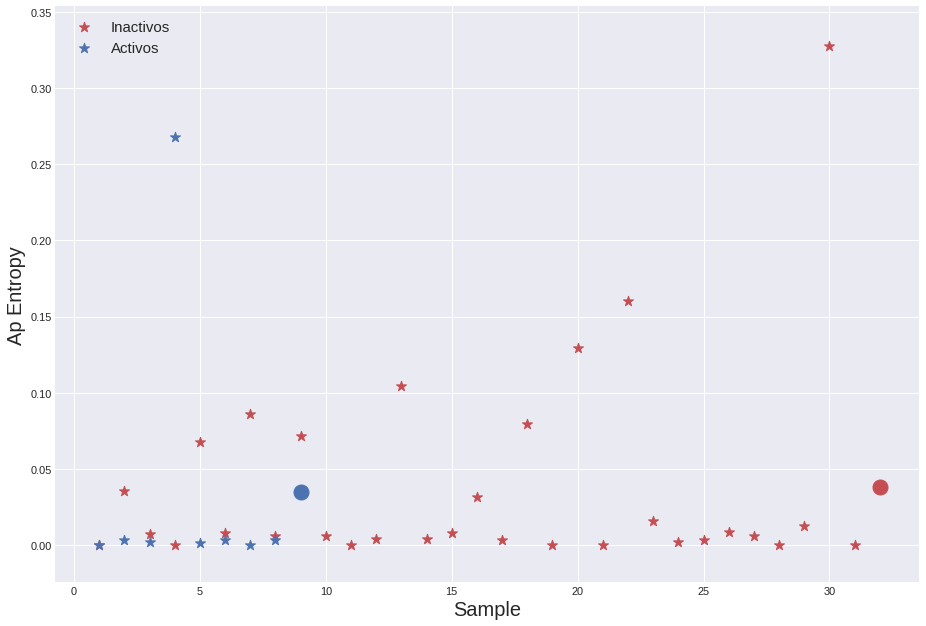

In [44]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['PNN50p'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['PNN50p'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('Ap Entropy',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['PNN50p']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['PNN50p']),c='b',marker='o',markersize=15)

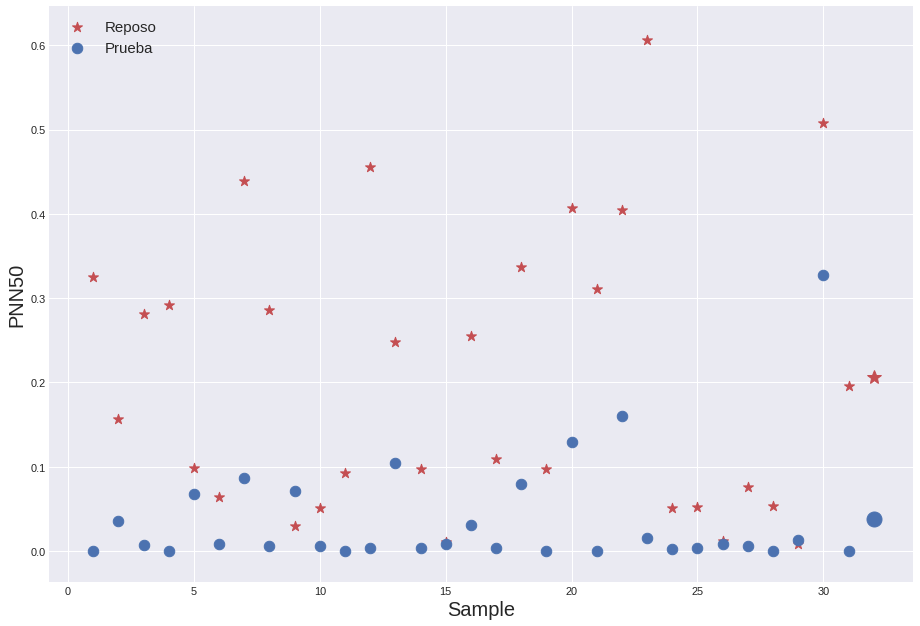

In [45]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['PNN50r'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['PNN50p'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('PNN50',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['PNN50r']),c='r',marker='*',markersize=15)
axes.plot(len(LowComplete)+1,np.mean(LowComplete['PNN50p']),c='b',marker='o',markersize=15)

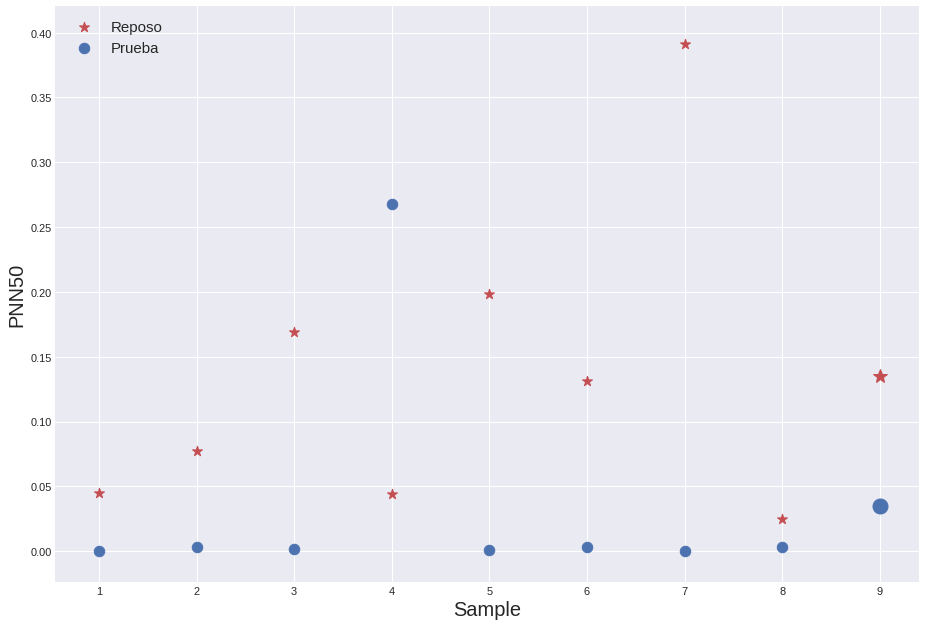

In [46]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['PNN50r'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['PNN50p'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('PNN50',fontsize=20)

axes.plot(len(ActComplete)+1,np.mean(ActComplete['PNN50r']),c='r',marker='*',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['PNN50p']),c='b',marker='o',markersize=15)

## RMSSDp

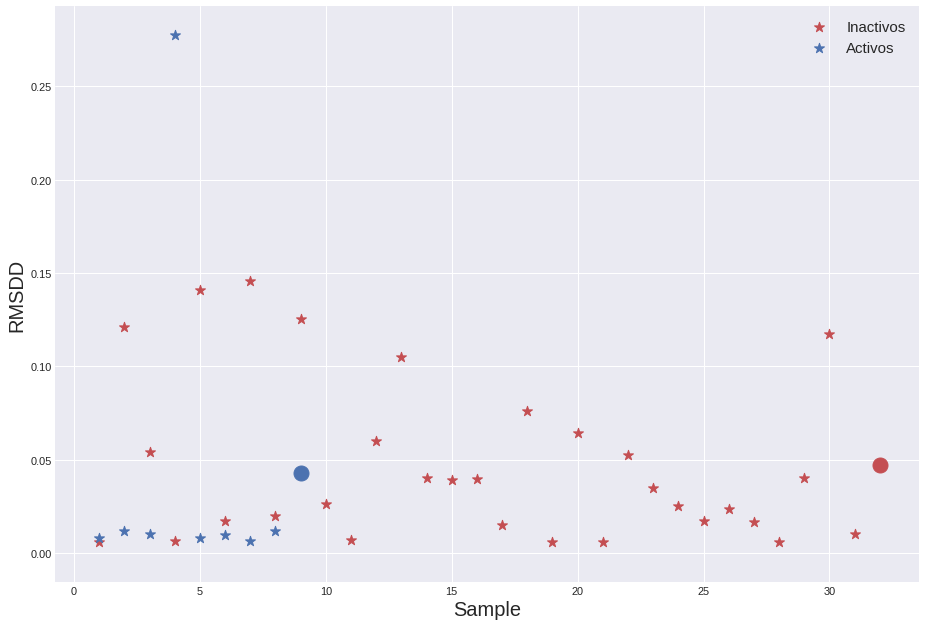

In [47]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['RMSSDp'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['RMSSDp'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('RMSDD',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['RMSSDp']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['RMSSDp']),c='b',marker='o',markersize=15)

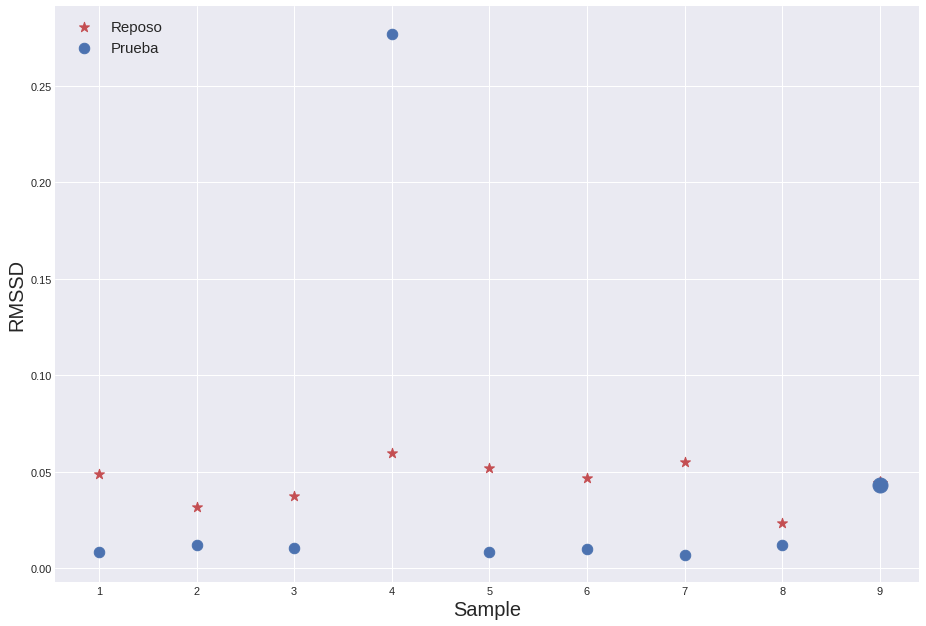

In [48]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['RMSSDr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['RMSSDp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('RMSSD',fontsize=20)

axes.plot(len(ActComplete)+1,np.mean(ActComplete['RMSSDr']),c='r',marker='*',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['RMSSDp']),c='b',marker='o',markersize=15)

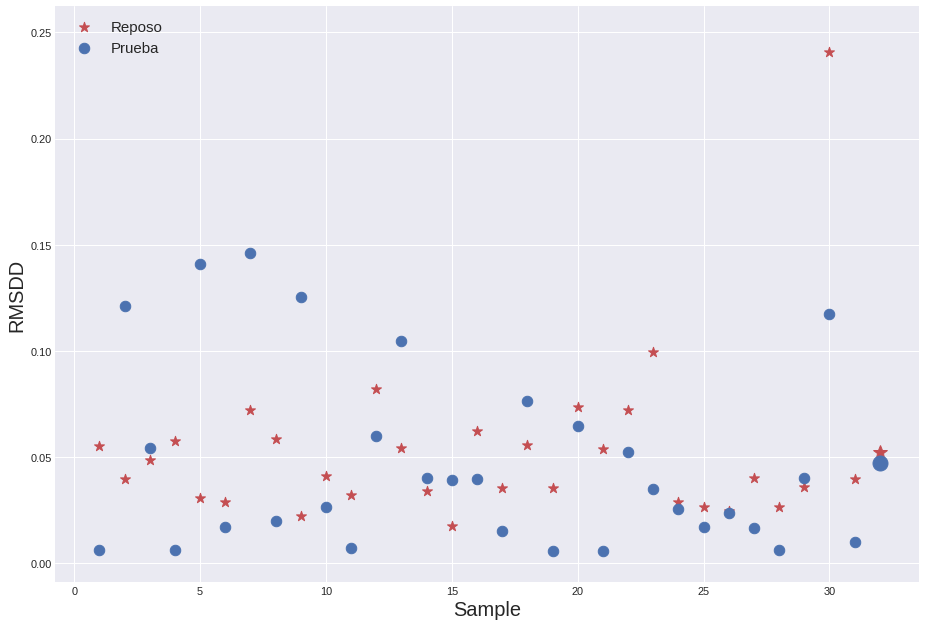

In [49]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['RMSSDr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['RMSSDp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('RMSDD',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['RMSSDr']),c='r',marker='*',markersize=15)
axes.plot(len(LowComplete)+1,np.mean(LowComplete['RMSSDp']),c='b',marker='o',markersize=15)

## SDNNp

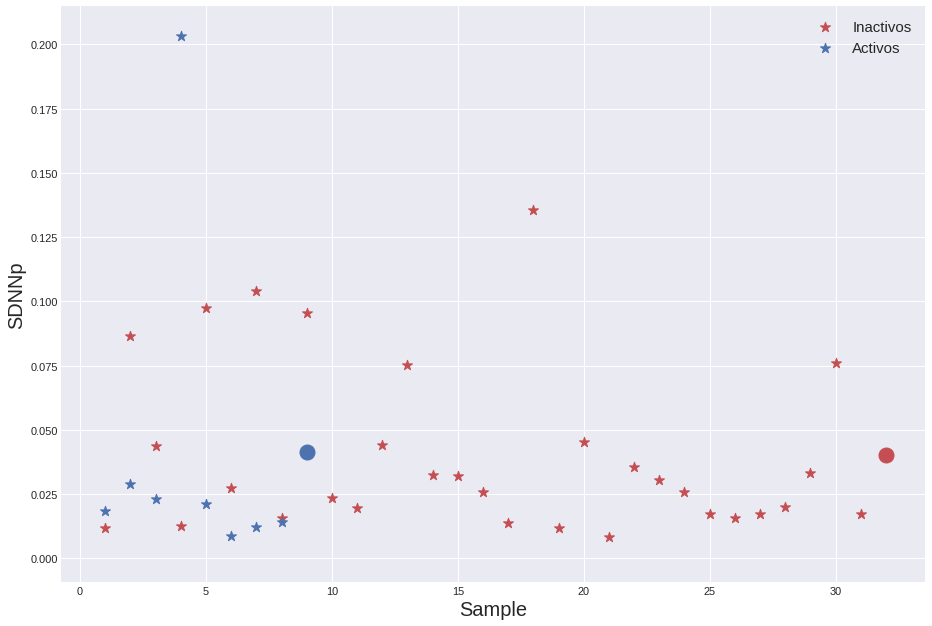

In [50]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['SDNNp'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['SDNNp'],c='b',marker='*',s=110)

plt.legend(['Inactivos','Activos'],fontsize=15)
plt.xlabel('Sample',fontsize=20)
plt.ylabel('SDNNp',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['SDNNp']),c='r',marker='o',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['SDNNp']),c='b',marker='o',markersize=15)

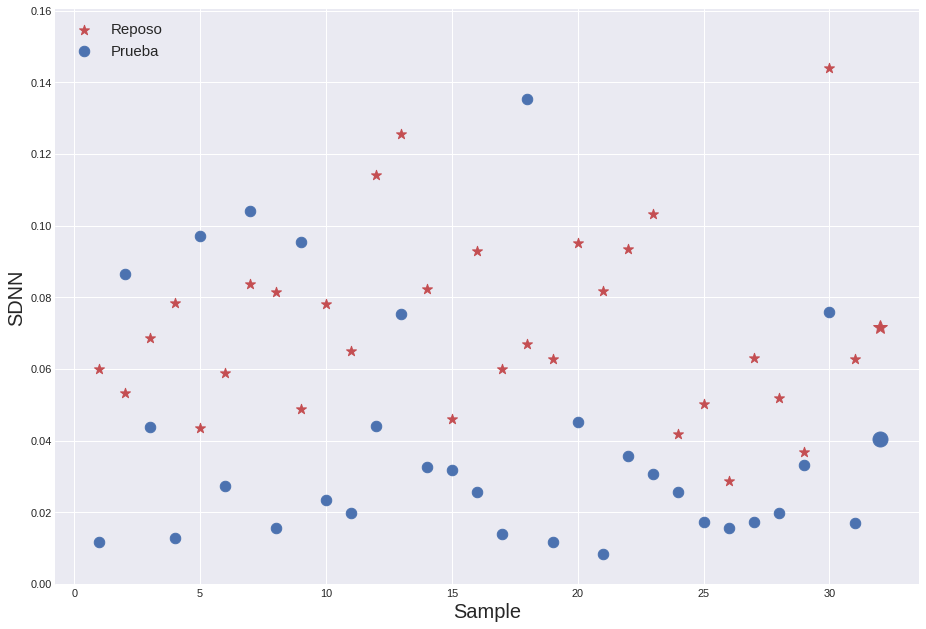

In [51]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['SDNNr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(LowComplete)+1),LowComplete['SDNNp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('SDNN',fontsize=20)

axes.plot(len(LowComplete)+1,np.mean(LowComplete['SDNNr']),c='r',marker='*',markersize=15)
axes.plot(len(LowComplete)+1,np.mean(LowComplete['SDNNp']),c='b',marker='o',markersize=15)

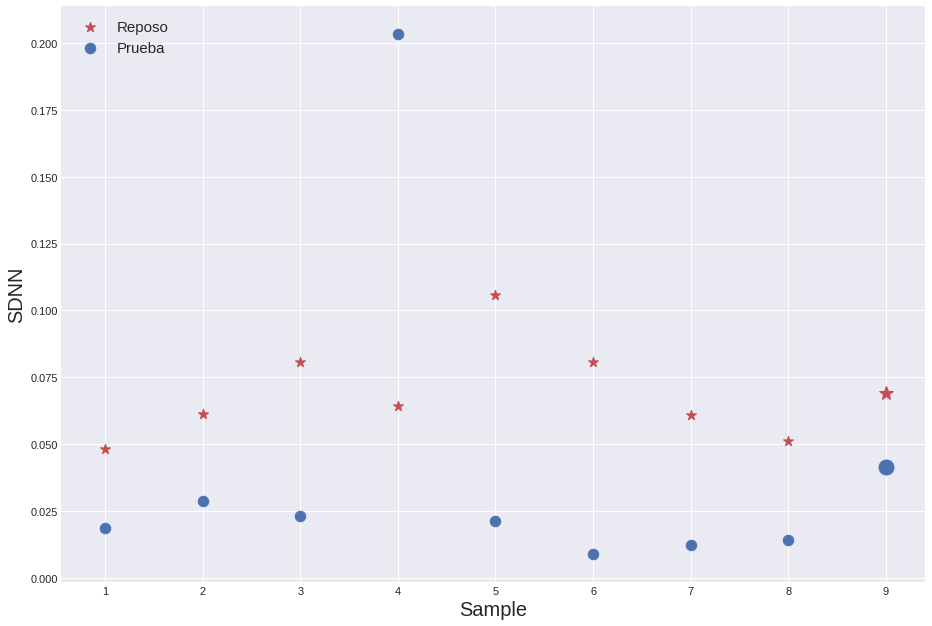

In [52]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])

plt.style.use('seaborn-darkgrid')
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['SDNNr'],c='r',marker='*',s=110)
axes.scatter(np.arange(1,len(ActComplete)+1),ActComplete['SDNNp'],c='b',marker='o',s=110)

plt.legend(['Reposo','Prueba'],fontsize=15,loc='upper left')
plt.xlabel('Sample',fontsize=20)
plt.ylabel('SDNN',fontsize=20)

axes.plot(len(ActComplete)+1,np.mean(ActComplete['SDNNr']),c='r',marker='*',markersize=15)
axes.plot(len(ActComplete)+1,np.mean(ActComplete['SDNNp']),c='b',marker='o',markersize=15)

# Statistical tests

We can use this test, if we observe two independent samples from the same or different population, e.g. exam scores of boys and girls or of two ethnic groups. The test measures whether the average (expected) value differs significantly across samples. If we observe a large p-value, for example larger than 0.05 or 0.1, then we cannot reject the null hypothesis of identical average scores. If the p-value is smaller than the threshold, e.g. 1%, 5% or 10%, then we reject the null hypothesis of equal averages.


In [53]:

## Import the packages
from scipy import stats


## Define 2 random distributions
#Sample Size
N = 10
#Gaussian distributed data with mean = 2 and var = 1
a = np.random.randn(N) + 2
#Gaussian distributed data with with mean = 0 and var = 1
b = np.random.randn(N)


## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation

#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)

#std deviation
s = np.sqrt((var_a + var_b)/2)
print('Standard deviation ',s)



## Calculate the t-statistics
t = (a.mean() - b.mean())/(s*np.sqrt(2/N))



## Compare with the critical t-value
#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = 1 - stats.t.cdf(t,df=df)


print("t = " + str(t))
print("p = " + str(2*p))
### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.


## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(a,b)
print("t = " + str(t2))
print("p = " + str(p2))


Standard deviation  0.879864895767739
t = 3.740222475313658
p = 0.0014982270398680164
t = 3.740222475313658
p = 0.0014982270398680633


# Pruebas Estadisticas para Physionet

 $H_{0}=$ No existe una diferencia significativa entre ambas medias
 
 $H_{1}=$ Existe una diferencia significativa entre ambas medias. 

### Ap Entropy Dormidos

In [52]:
dormidosCHF1=np.array(dormidosCHF['ApEntropy'].dropna() )
dormidosH1=np.array(dormidosH['ApEntropy'].dropna())

In [53]:
tDormidos, pDormidos = stats.ttest_ind(dormidosCHF1,dormidosH1)

In [54]:
print(tDormidos,pDormidos)

-4.0481519158977415 0.00011074175576521039


El valor de p=0.000110741 es menor que el intervalo de confianza $\alpha=0.05$ por lo tanto se rechaza $H_0$ y se acepta $H_1$, siendo así la diferencia entre las medias significativa. 

### Sample Entropy Dormidos

In [55]:
dormidosCHF1=np.array(dormidosCHF['SampleEntropy'].dropna() )
dormidosH1=np.array(dormidosH['SampleEntropy'].dropna())

In [56]:
tDormidos, pDormidos = stats.ttest_ind(dormidosCHF1,dormidosH1)

In [57]:
print(tDormidos,pDormidos)

-3.5199829608621718 0.0006825922818150329


El valor de p=0.00068259 es menor que el intervalo de confianza $\alpha=0.05$ por lo tanto se rechaza $H_0$ y se acepta $H_1$, siendo así la diferencia entre las medias significativa. 

### Fuzzy entropy

In [58]:
dormidosCHF1=np.array(dormidosCHF['FuzzyEntropy'].dropna() )
dormidosH1=np.array(dormidosH['FuzzyEntropy'].dropna())

In [59]:
tDormidos, pDormidos = stats.ttest_ind(dormidosCHF1,dormidosH1)

In [60]:
print(tDormidos,pDormidos)

-3.8795108306023325 0.00020160582312409614


El valor de p=0.000201 es menor que el intervalo de confianza $\alpha=0.05$ por lo tanto se rechaza $H_0$ y se acepta $H_1$, siendo así la diferencia entre las medias significativa

# Pruebas Estadísticas para pruebas de esfuerzo

Para estas pruebas se tienen 31 jovenes, de los cuales 25 entran en la categoría de sedentarios y 6 en la de activos,  y 8 adultos de los cuales 6 entran en la categoría de sedentarios y 2 en la de activos. Las pruebas de hipótesis se realizan sobre las pendientes de entropia al pasar de reposo a esfuerzo (4mph para jovenes y 3.5mph para adultos)

 $H_{0}=$ No existe una diferencia significativa entre ambas medias
 
 $H_{1}=$ Existe una diferencia significativa entre ambas medias. 

### Ap entropy Completos

In [61]:
activosAP=np.array(ActComplete['PendienteAp'])
sedentariosAp=np.array(LowComplete['PendienteAp'])

In [62]:
tEsfuerzo, pEsfuerzo = stats.ttest_ind(activosAP,sedentariosAp)

In [63]:
print(tEsfuerzo,pEsfuerzo)

3.539456698009551 0.0011016056948872548


El valor de p=0.001101 es menor que el intervalo de confianza $\alpha=0.05$ por lo tanto se rechaza $H_0$ y se acepta $H_1$, siendo así la diferencia entre las medias significativa

### Sample Entropy Completos

In [64]:
activosSamp=np.array(ActComplete['PendienteSamp'])
sedentariosSamp=np.array(LowComplete['PendienteSamp'])

In [65]:
tEsfuerzo, pEsfuerzo = stats.ttest_ind(activosSamp,sedentariosSamp)

In [66]:
print(tEsfuerzo,pEsfuerzo)

3.1392675996687776 0.0033208447961831458


El valor de p=0.0.0033208 es menor que el intervalo de confianza $\alpha=0.05$ por lo tanto se rechaza $H_0$ y se acepta $H_1$, siendo así la diferencia entre las medias significativa

### Fuzzy entropy completos

In [67]:
activosFuzz=np.array(ActComplete['PendienteFuzz'])
sedentariosFuzz=np.array(LowComplete['PendienteFuzz'])

In [68]:
tEsfuerzo, pEsfuerzo = stats.ttest_ind(activosFuzz,sedentariosFuzz)

In [69]:
print(tEsfuerzo,pEsfuerzo)

2.967193369684203 0.005242381973250801


El valor de p=0.00524 es menor que el intervalo de confianza  𝛼=0.05  por lo tanto se rechaza  𝐻0  y se acepta  𝐻1 , siendo así la diferencia entre las medias significativa

In [70]:
ActComplete.groupby('Genero').count()

,3.5MPHAp,3.5MPHFuzz,3.5MPHSamp,4MPHAp,4MPHFuzz,4MPHSamp,AVGp,AVGr,Cuestionario,Edad,...,Peso,Peso,RMSSDp,RMSSDr,ReposoAp,ReposoFuzz,ReposoSamp,SDNNp,SDNNr,Talla
Genero,,,,,,,,,,,,,,,,,,,,,
H,7,7,7,7,7,7,7,7,7,7,...,6,1,7,7,7,7,7,7,7,7
M,1,1,1,1,1,1,1,1,1,1,...,0,1,1,1,1,1,1,1,1,1


In [71]:
adultosLow.groupby('Genero').count()

,Persona,Edad,Talla,Peso,IMC,Cuestionario,ReposoSamp,3.5MPHSamp,4MPHSamp,PendienteSamp,...,4MPHAp,PendienteAp,AVGr,PNN50r,RMSSDr,SDNNr,AVGp,PNN50p,RMSSDp,SDNNp
Genero,,,,,,,,,,,,,,,,,,,,,
H,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
M,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [72]:
print( 'edad activos',pd.to_numeric(ActComplete['Edad']).mean())
print('edad sedentarios',pd.to_numeric(LowComplete['Edad']).mean())

edad activos 28.25
edad sedentarios 29.548387096774192


In [73]:
(pd.to_numeric(jovenesHigh['Edad']).mean() + pd.to_numeric(jovenesLow['Edad'].mean()))/2

22.683333333333334

In [74]:
jovenesLow['Edad'].mean()

23.2

In [75]:
pd.to_numeric(adultosHigh['Edad']).mean()

46.5

In [76]:
pd.to_numeric(adultosLow['Edad']).mean()

56.0

In [78]:
np.mean(pd.to_numeric(adultos['Edad']))

53.625

# ECG Plots

In [28]:
import scipy.io

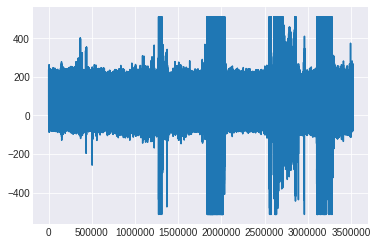

In [29]:
data = scipy.io.loadmat("./entropyPaper/señalECG.mat")
plt.plot(data['ecg'])

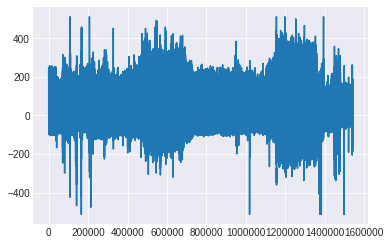

In [31]:
data = scipy.io.loadmat('./entropyPaper/señalECGJorge.mat')
plt.plot(data['ecg'])

In [40]:
dt = data['ecg'][78000:80000]

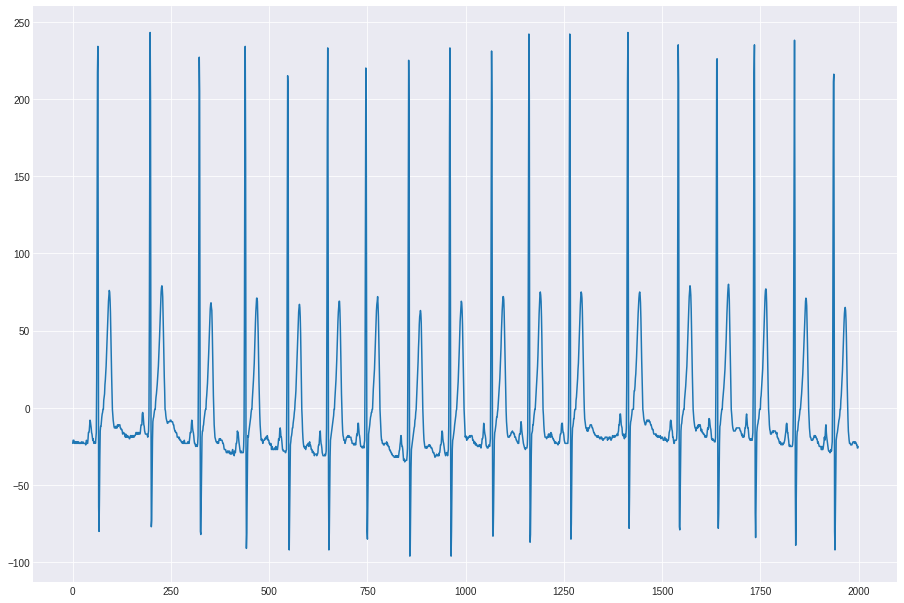

In [42]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt)

In [59]:
s = np.arange(0,2000,125)

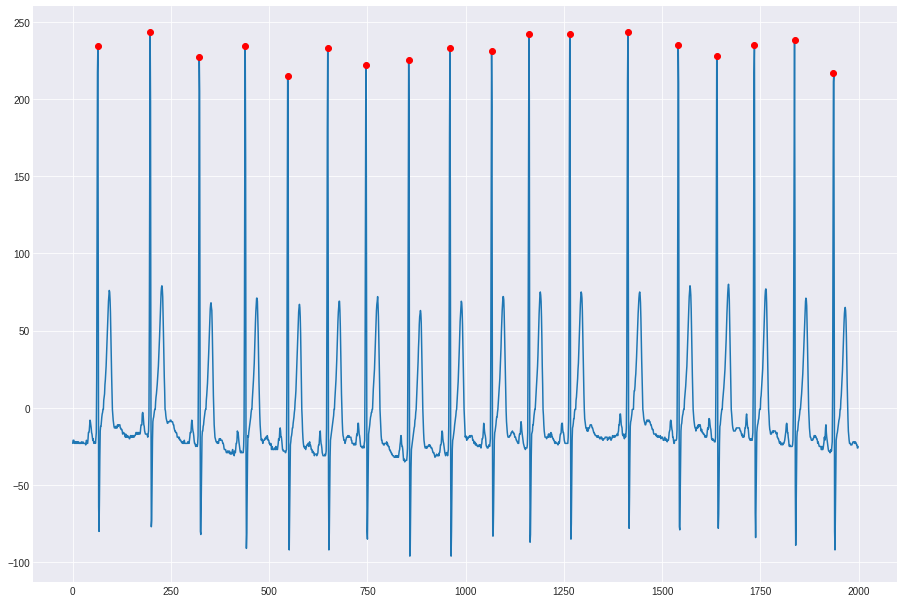

In [73]:
mx = []
amx = []
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt)
for i in range(1,len(s)):
    mx = np.max(dt[s[i-1]:s[i]])
    amx = np.argmax(dt[s[i-1]:s[i]])
    plt.plot(amx + s[i-1],mx,'or')
plt.plot(747,222,'or')
plt.plot(1640,228,'or')
plt.plot(1935,217,'or')


In [132]:
data = scipy.io.loadmat("./entropyPaper/serieRR_completa.mat")
dt = data['rr']

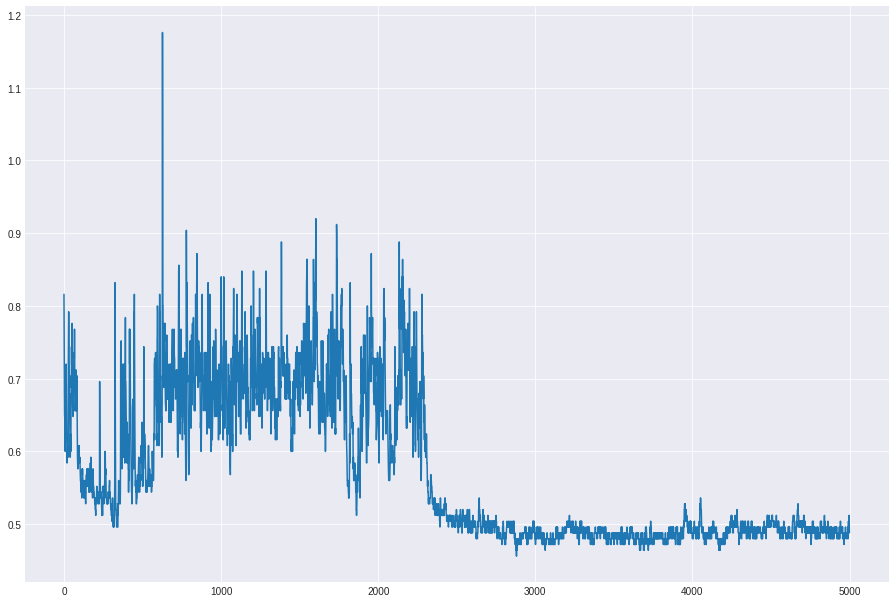

In [133]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt[3000:8000])


In [134]:
data = scipy.io.loadmat("./entropyPaper/serieRR-completa_amparo.mat")
dt = data['rr']

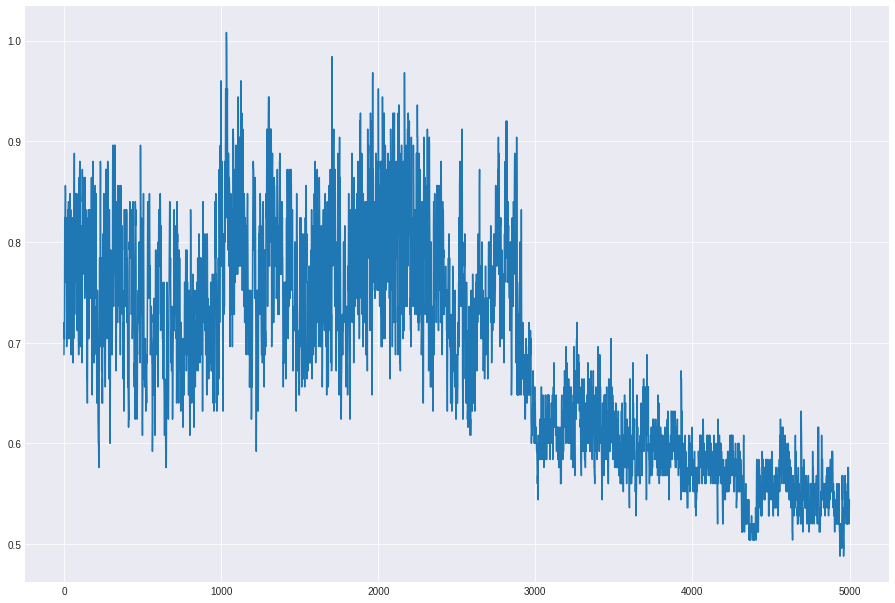

In [135]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
dt1 = dt[3000:8000]
dt1[np.argmax(dt1)] = dt1[np.argmax(dt1)-4]
dt1[np.argmax(dt1)] = dt1[np.argmax(dt1)-4]
dt1[np.argmax(dt1)] = dt1[np.argmax(dt1)-4]
plt.plot(dt1)


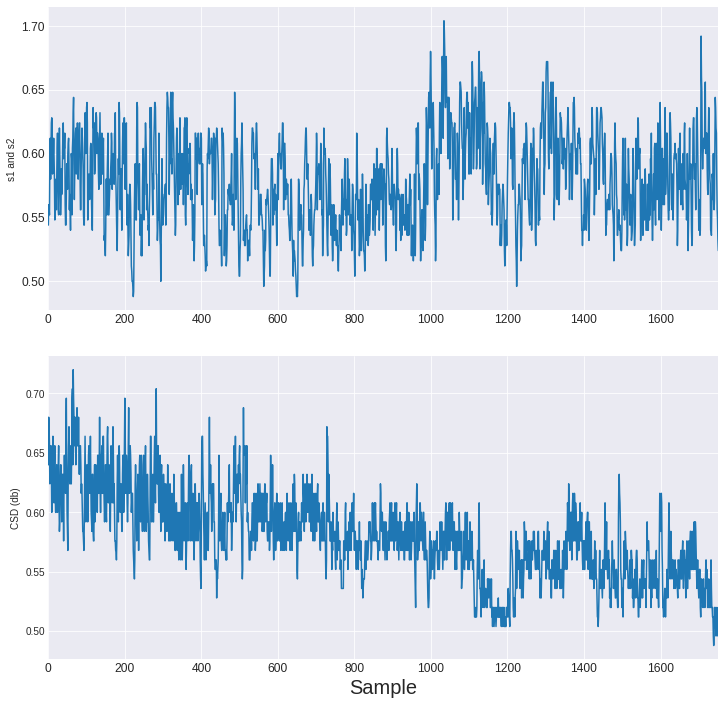

In [166]:


fig, (ax1, ax2) = plt.subplots(2, 1,figsize=(12,12))
# axes=fig.add_axes([0.1,0.1,2,2])
# make a little extra space between the subplots
fig.subplots_adjust(hspace=0.15)
ax1.plot(dt1[:1800])
ax1.set_xlim(0, 1750)

ax1.set_xticklabels(np.arange(0,1700,200),fontsize = 12)
ax1.set_yticklabels( ['0.5','0.6','0.7','0.8','0.9','1.0'],fontsize = 12)


ax1.set_ylabel('s1 and s2')
ax1.grid(True)

ax2.plot(dt1[3200:5950])
ax2.set_xlim(0, 1750)
ax2.set_xlabel('Sample',fontsize = 20)
ax2.set_ylabel('CSD (db)')
plt.xticks(fontsize = 15)

ax2.set_xticklabels(np.arange(0,1700,200),fontsize = 12)
ax1.set_yticklabels( ['0.45','0.50','0.55','0.60','0.65','1.70'],fontsize = 12)
plt.show()

In [167]:
data = scipy.io.loadmat("./entropyPaper/serieRR_completa.mat")
dt = data['rr']

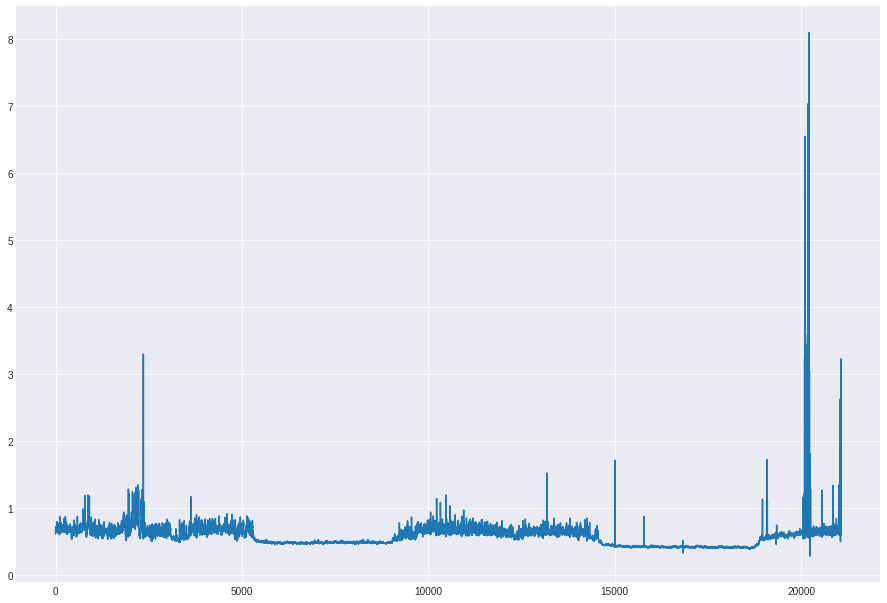

In [168]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt)

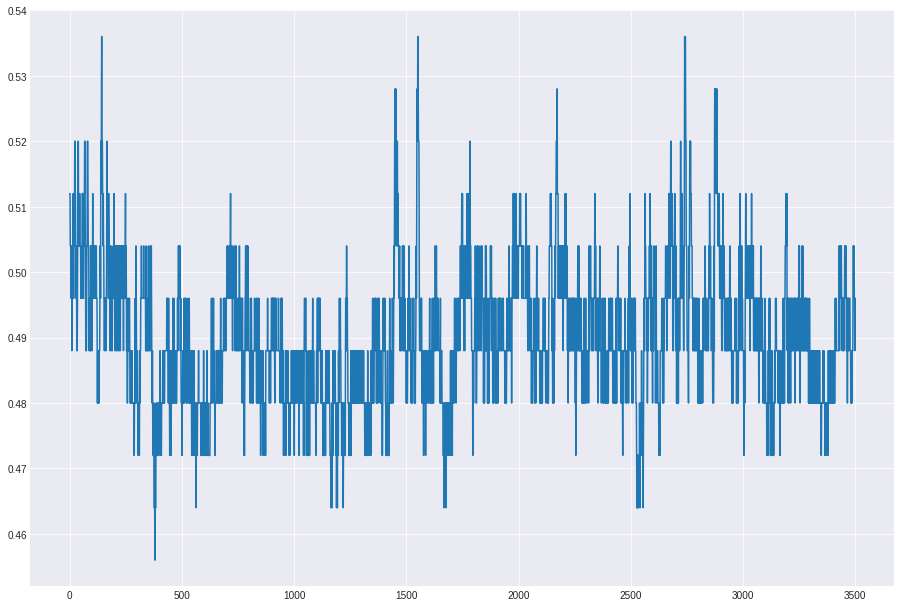

In [169]:
dt1 = dt[5500:9000]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt1)

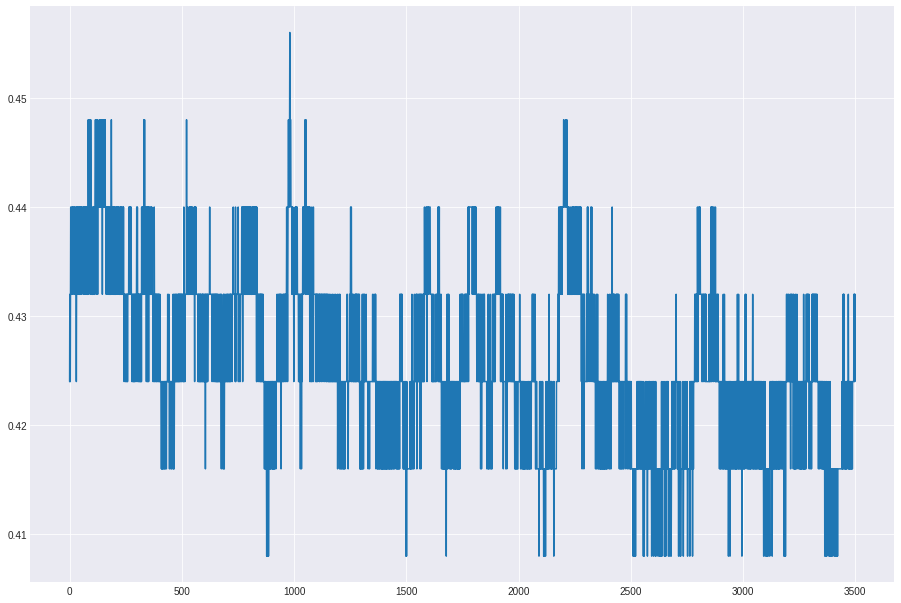

In [173]:
dt2 = dt[15000:18500]
dt2[np.argmax(dt2)] = dt2[np.argmax(dt2)-4]
dt2[np.argmax(dt2)] = dt2[np.argmax(dt2)-4]
dt2[np.argmax(dt2)] = dt2[np.argmax(dt2)-4]
dt2[np.argmin(dt2)] = dt2[np.argmin(dt2)-4]
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(dt2)

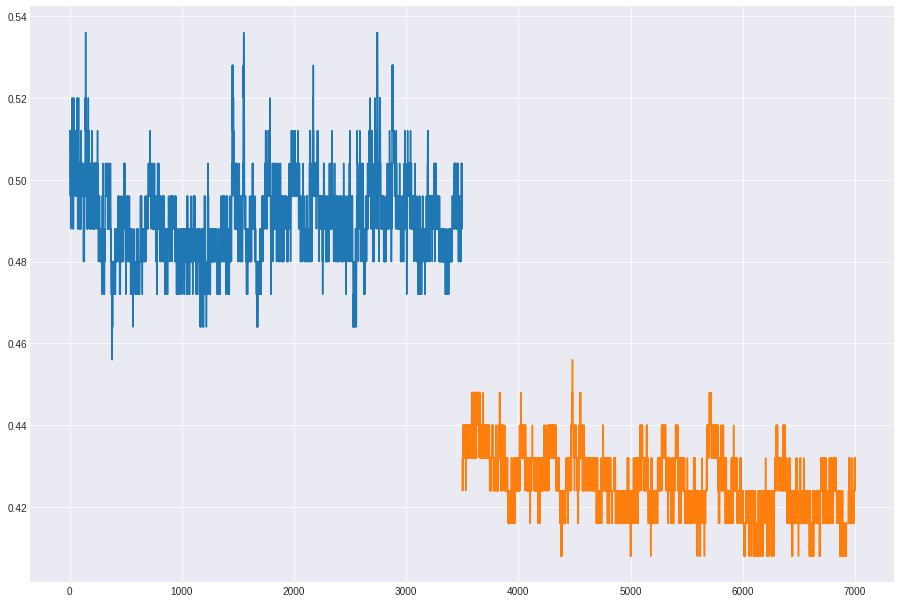

In [187]:
fig=plt.figure()
axes=fig.add_axes([0.1,0.1,2,2])
plt.plot(np.arange(0,len(dt1)),dt1)
plt.plot(np.arange(len(dt1),len(dt1)+len(dt2)),dt2)

In [184]:
d1

[array([0.512]),
 array([0.512]),
 array([0.512]),
 array([0.504]),
 array([0.504]),
 array([0.504]),
 array([0.504]),
 array([0.496]),
 array([0.504]),
 array([0.504]),
 array([0.488]),
 array([0.504]),
 array([0.504]),
 array([0.504]),
 array([0.496]),
 array([0.496]),
 array([0.512]),
 array([0.504]),
 array([0.496]),
 array([0.512]),
 array([0.512]),
 array([0.512]),
 array([0.504]),
 array([0.52]),
 array([0.52]),
 array([0.512]),
 array([0.512]),
 array([0.504]),
 array([0.504]),
 array([0.496]),
 array([0.504]),
 array([0.504]),
 array([0.488]),
 array([0.496]),
 array([0.488]),
 array([0.496]),
 array([0.504]),
 array([0.512]),
 array([0.52]),
 array([0.52]),
 array([0.504]),
 array([0.512]),
 array([0.512]),
 array([0.504]),
 array([0.504]),
 array([0.512]),
 array([0.504]),
 array([0.504]),
 array([0.504]),
 array([0.504]),
 array([0.496]),
 array([0.496]),
 array([0.504]),
 array([0.496]),
 array([0.496]),
 array([0.496]),
 array([0.512]),
 array([0.512]),
 array([0.512]),
 